# Big_Data_Mart_Sales_Project :-  DataTrained   |   Practice Project_7

## Problem Statement:

## The properties of products and stores which play a key role in increasing the sales of Big Data Mart products

#### Submitted by: Tamali Saha (tamali428@gmail.com)

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/bigdatamart_rep

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [4]:
# checking shape

print("Train data shape:" ,train.shape)
print("Test data shape:" ,test.shape)

Train data shape: (8523, 12)
Test data shape: (5681, 11)


#### Observation: 

Training dataset contains 8523 rows & 12 columns.

Testing dataset contains 5681 rows & 11 columns.

## Data Exploration & Cleaning on Train Dataset:

In [5]:
# column names of train data

train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Observations:

1. Item_Identifier, Item_Fat_Content,Item_Type,Outlet_Identifier, Outlet_Size,Outlet_Location_Type,Outlet_Type are Categorical datatype (object).

2. 9 unique values for Outlet_Establishment_Year and that are int64.

3. Except these all are float64.

4. Null values are present in training data for Item_Weight and Outlet_Size column.

5. 1 target variable is Item_Outlet_Sales.

### Exploration of Train Categorical data:- 

Checking different unique values for categorical features

#### 1. Item_Identifier:

In [8]:
train["Item_Identifier"]. unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

It is just unique ID for every individual data for the whole dataset.

#### 2. Item_Fat_Content:

In [9]:
train["Item_Fat_Content"]. value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

1. Low Fat, low fat, LF are same. Let's make it one unique id.

2. Regular, reg are same. Let's make it one unique id.

In [10]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat',
                                                               'reg':'Regular'})

In [11]:
train["Item_Fat_Content"]. value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

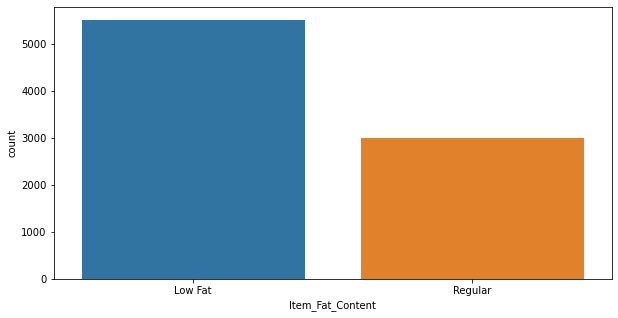

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(train['Item_Fat_Content'])
plt.show()



Most selling items are in low fat.

#### 3. Item_Type:

In [13]:
train["Item_Type"]. value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

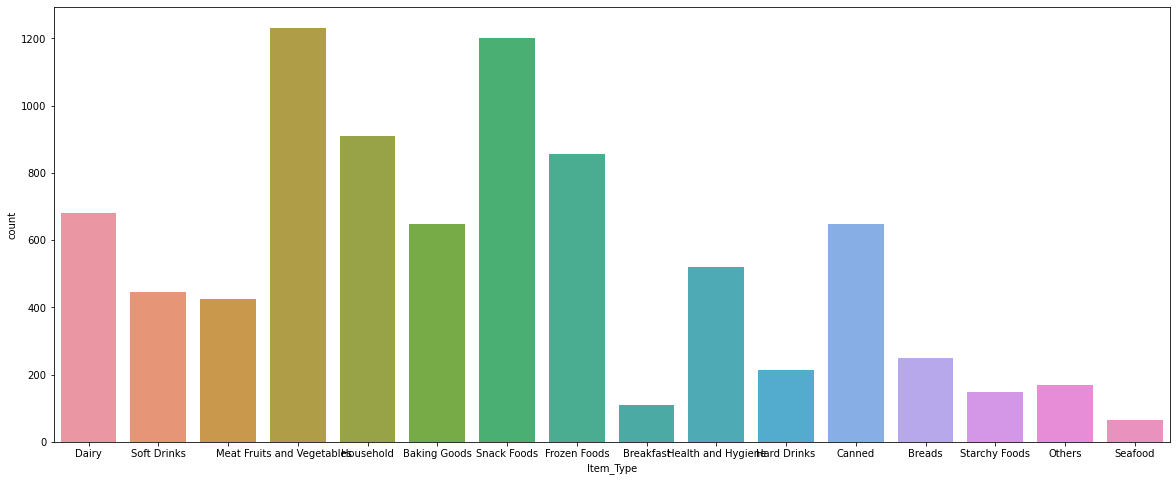

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(train['Item_Type'])
plt.show()

There are 16 different unique values for the given dataset.

The most sold item is Fruits and Vegetables.

The least sold item is Seafood.

#### 4. Outlet_Identifier:

In [15]:
train["Outlet_Identifier"]. value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

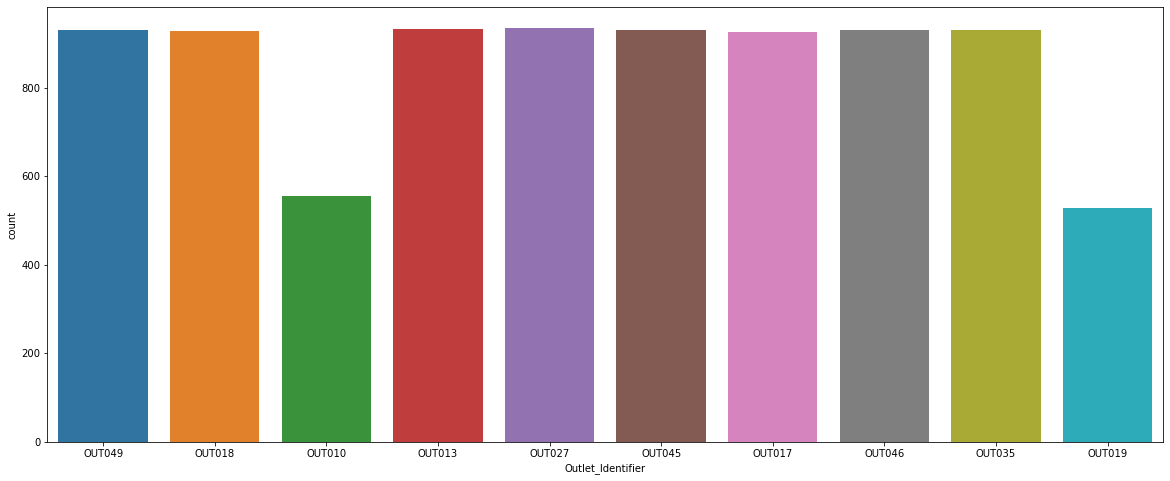

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(train['Outlet_Identifier'])
plt.show()

All different Outlet_Identifier have overall same percentage of selling.

#### 5.Outlet_Size:

In [17]:
train["Outlet_Size"]. value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

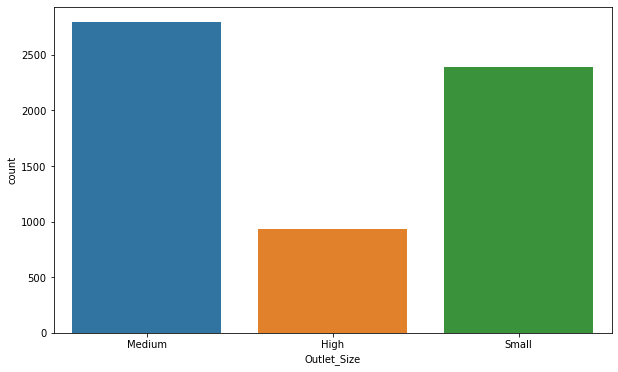

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(train['Outlet_Size'])
plt.show()

Least sell is for High Outlet_Size.


#### 6.Outlet_Location_Type:

In [19]:
train["Outlet_Location_Type"]. value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

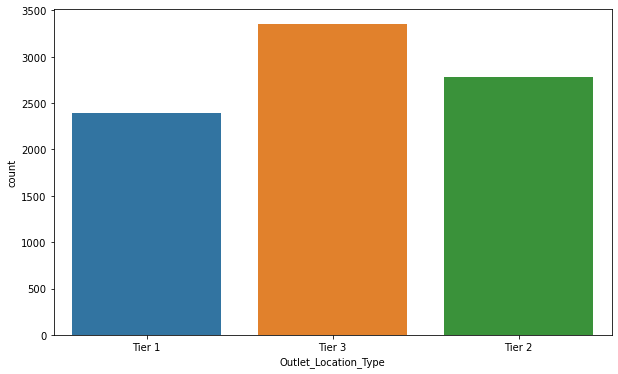

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(train['Outlet_Location_Type'])
plt.show()

All different Outlet_Location_Type have overall same percentage of selling.

####  7. Outlet_Type:

In [21]:
train["Outlet_Type"]. value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

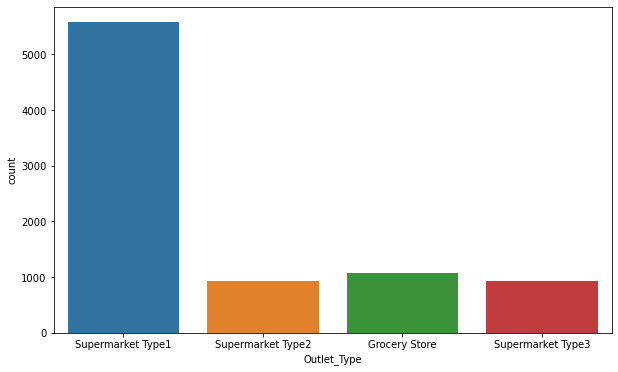

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(train['Outlet_Type'])
plt.show()

Supermarket Type1 is the most selling Outlet_Type as compared to others three.

### Exploration of Train Numarical data:- 

#### 1. For discrete datatype(Outlet_Establishment_Year) :-

In [23]:
train["Outlet_Establishment_Year"]. value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

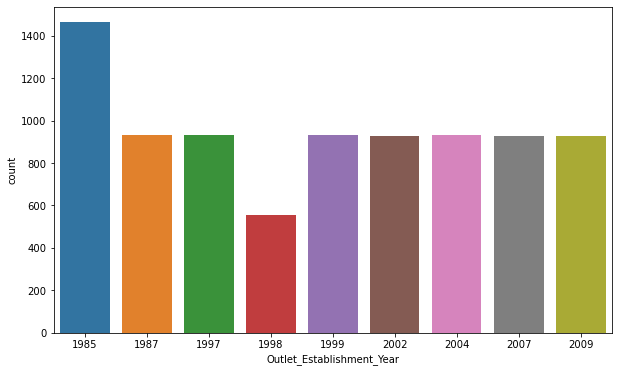

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(train['Outlet_Establishment_Year'])
plt.show()

There are total 9 different Outlet_Establishment_Year of the stores.

#### Modify Outlet_Establishment_Year:

In [25]:
train['Outlet_Age'] = train['Outlet_Establishment_Year'].apply(lambda x:2013-x)

train['Outlet_Age'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

#### 2. For cotinuous datatype :

In [26]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales   Outlet_Age  
count        8523.000000  8523.000000  
mean         2181.288914    15.168133  
std          1706.499616     8.371760  
min            33.290000     4.000000  
25%           834.247400     9.000000  
50%          1794.331000    14.000000  
75%          3101.296400    26.000000  
max         13086.964800    28.000000

#### Observations:

1. Here ,min of Item_Visibility is 0.
2. Item_Visibility and Item_Outlet_Sales seems right skewed as there s a big difference between quantile 75% and max

In [27]:
# First replace 0 by null

train['Item_Visibility']=train['Item_Visibility'].replace(0,np.nan)

In [28]:
# Then fillna by median() i.e. most frequent value

train['Item_Visibility'].fillna(train['Item_Visibility'].median(),inplace=True)

In [29]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.069699
std         0.048826
min         0.003575
25%         0.033085
50%         0.057792
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

#### Observations:

All 0 are replaced for Item_Visibility column.

### Checking duplicate:

In [30]:
#checking duplicate

train.duplicated().sum()

0

#### Observations:

No duplicate data are present.

### Impute null:

In [31]:
#checking null values

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Age                      0
dtype: int64

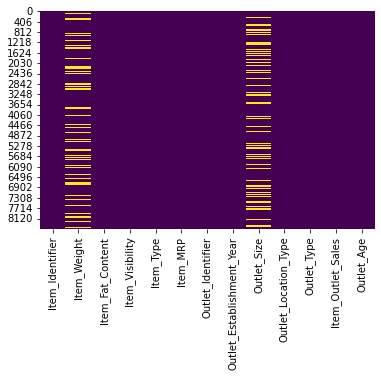

In [32]:
sns.heatmap(train.isnull(),cbar=False,cmap ='viridis')
plt.show()

### Observations: 
Null values are present for Item_Weight and Outlet_Size column.

#### Remove Null:

##### For Item_Weight:

Item_Weight is a float64 datatype with 1463 missing data. Let's fill it with the mean() of the column.

In [33]:
print('Percent of missing "Item_Weight" records is ', ((train['Item_Weight'].isnull().sum()/train.shape[0])*100))

Percent of missing "Item_Weight" records is  17.165317376510618


In [34]:
meanweight=pd.DataFrame(train.groupby('Item_Type')['Item_Weight'].mean())
meanweight

Item_Weight
Item_Type                         
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731

In [35]:
x= meanweight.index
y= meanweight.Item_Weight

# Item_Type values is keys and mean weight is values

mean=dict(zip(x,y))

# Make a new column "mean_weight" and maps values based on corresponding values of 'Item_Type'

train['mean_weight']=train['Item_Type'].map(mean)
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.057792   
4           NCD19         8.93          Low Fat         0.057792   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age  mean_weight  
0  Supermarket Type1          3735.1380          14    13.426069  
1  Supermarket Type2           443.4228           4    11.847460  
2  Supermarket Type1          2097.2700          14    12.817344  
3      Grocery Store           732.3800          15    13.224769  
4  Supermarket Type1           994.7052          26    13.384736

In [36]:
#filling null values from mean_weight in 'Item_Weight'

train['Item_Weight']=train['Item_Weight'].fillna(train['mean_weight'])

In [37]:
train["Item_Weight"].isna().sum()

0

In [38]:
train.drop(columns='mean_weight',inplace=True)

##### For Outlet_Size :

In [39]:
print('Percent of missing "Outlet_Size" records is ', ((train['Outlet_Size'].isnull().sum()/train.shape[0])*100))

Percent of missing "Outlet_Size" records is  28.27642848762173


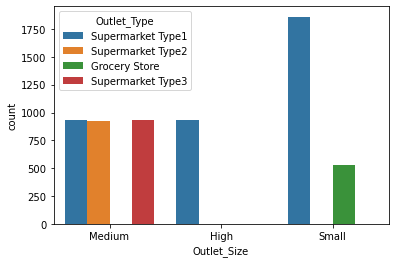

In [40]:
# visualise relation between Outlet_Size and Outlet_Type

sns.countplot('Outlet_Size',hue='Outlet_Type',data=train)
plt.show()

In [41]:
from scipy.stats import mode
mode_by_Outlet_Type= (lambda x:mode(x).mode[0]) 
mode_Outlet_size = train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc= mode_by_Outlet_Type)
mode_Outlet_size

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [42]:
#filling null values from mode_Outlet_size in 'Outlet_Size'

os = train['Outlet_Size'].isnull() 
train.loc[os,'Outlet_Size'] = train.loc[os,'Outlet_Type'].apply(lambda x: mode_Outlet_size[x])


In [43]:
train['Outlet_Size'].isnull().sum()

0

#### Observations:

Replace NULL of Item_Weight column by mean weight of respective Item_Type

Replace NULL of Outlet_Size column by mode of respective Outlet_Type

### Modify Outlet_Establishment_Year column:

## Data Exploration & Cleaning on Test Dataset:

In [44]:
# column names of test data

test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [45]:
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#### Observations:

1. 7 columns have Categorical datatype (object).

2. 9 unique values for Outlet_Establishment_Year and that are int64.

3. Except these all are float64.

4. Null values are present for Item_Weight, Outlet_Size column.

### Exploration of Test Categorical data:- 

Checking different unique values for categorical features

#### 1. Item_Identifier:

In [47]:
test["Item_Identifier"]. unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

It is just unique ID for every individual data for the whole dataset.

#### 2. Item_Fat_Content:

In [48]:
test["Item_Fat_Content"]. value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [49]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat',
                                                               'reg':'Regular'})
test["Item_Fat_Content"]. value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

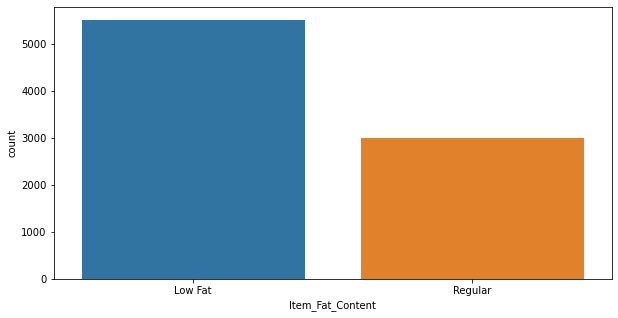

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(train['Item_Fat_Content'])
plt.show()

Like train dataset, here also replece Item_Fat_Content

#### 3. Item_Type:

In [51]:
test["Item_Type"]. value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

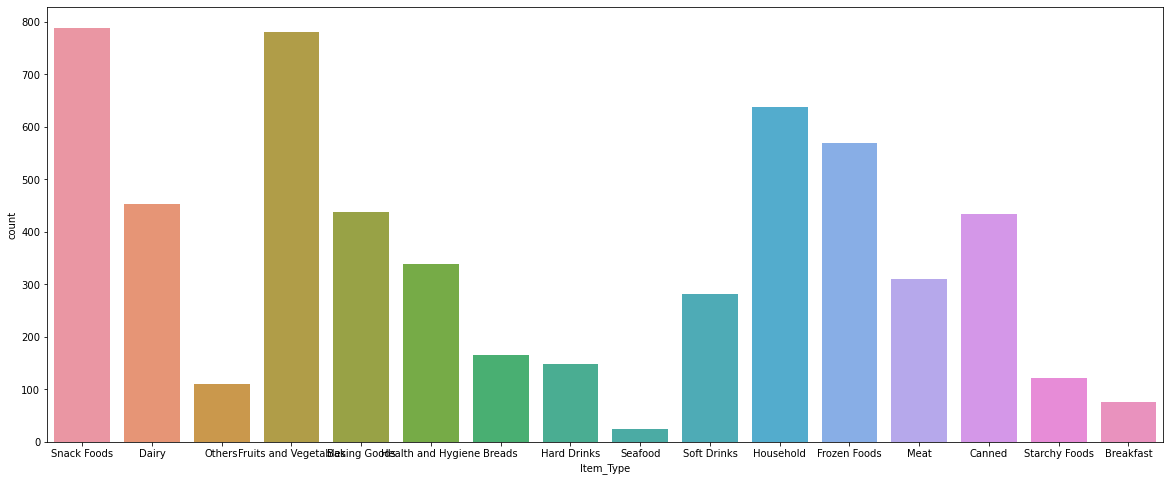

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(test['Item_Type'])
plt.show()

There are 16 different unique values for the given dataset.

The most sold item is Snack Foods.

Like train dataset, the least sold item is Seafood.

#### 4. Outlet_Identifier:

In [53]:
test["Outlet_Identifier"]. value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

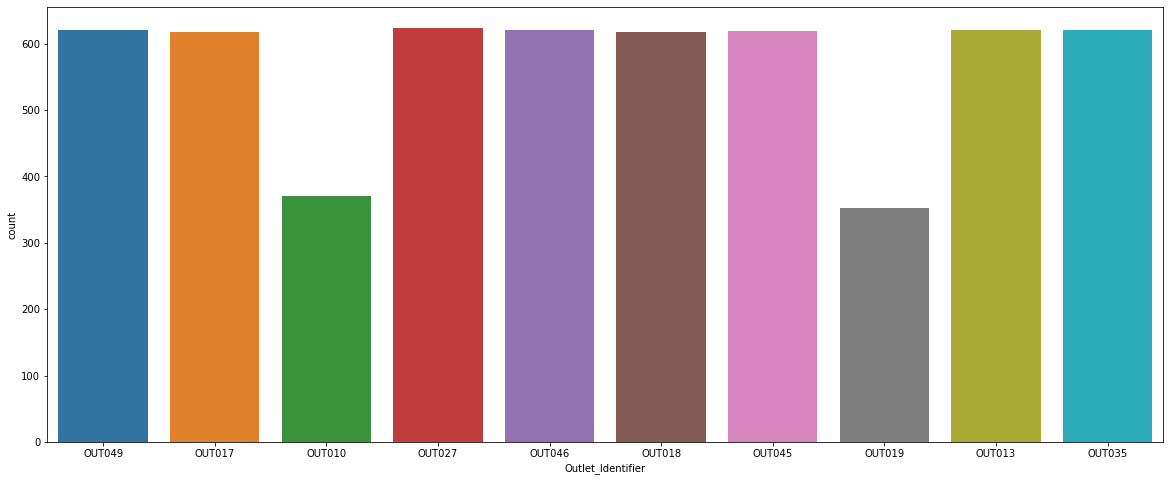

In [54]:
plt.figure(figsize=(20,8))
sns.countplot(test['Outlet_Identifier'])
plt.show()

Like training dataset, all outlet has overall same percentage of selling

#### 5.Outlet_Size:

In [55]:
test["Outlet_Size"]. value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

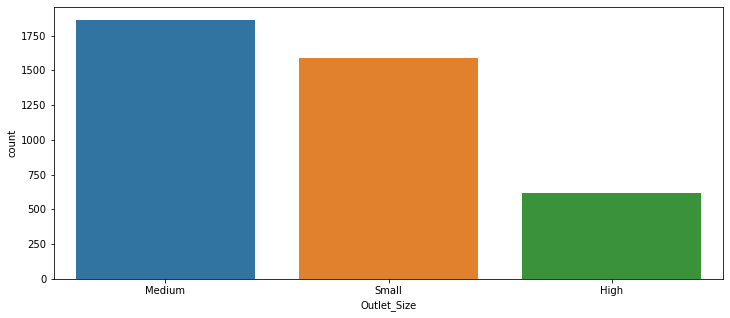

In [56]:
plt.figure(figsize=(12,5))
sns.countplot(test['Outlet_Size'])
plt.show()

Here, least data is for outlet size "High"

#### 6.Outlet_Location_Type:

In [57]:
test["Outlet_Location_Type"]. value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

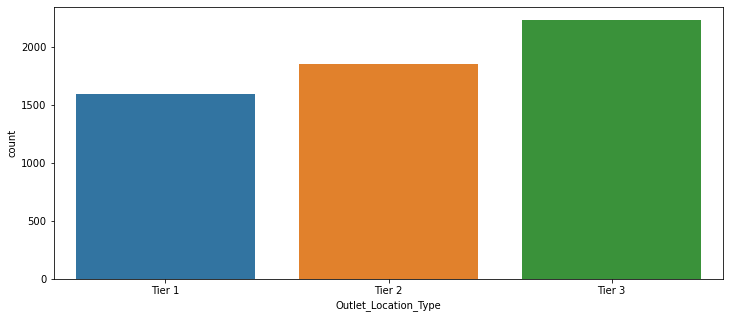

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(test['Outlet_Location_Type'])
plt.show()

####  7. Outlet_Type:

In [59]:
test["Outlet_Type"]. value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

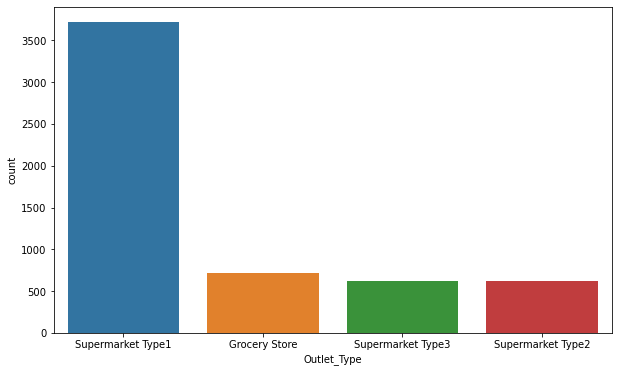

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(test['Outlet_Type'])
plt.show()

Most of the data is related with Supermarket Type1
### Exploration of Test Numarical data:- 
#### 1. For discrete datatype(Outlet_Establishment_Year) :-

In [61]:
test["Outlet_Establishment_Year"]. value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

#### Modify Outlet_Establishment_Year:

In [62]:
test['Outlet_Age'] = test['Outlet_Establishment_Year'].apply(lambda x:2013-x)
test['Outlet_Age'].head()

0    14
1     6
2    15
3     6
4    28
Name: Outlet_Age, dtype: int64

Like Training dataset, there are total 9 different Outlet_Establishment_Year of the stores.

Modify those years as Outlet_age for better use.

#### 2. For continuous datatype :

In [63]:
test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  4705.000000      5681.000000  5681.000000                5681.000000   
mean     12.695633         0.065684   141.023273                1997.828903   
std       4.664849         0.051252    61.809091                   8.372256   
min       4.555000         0.000000    31.990000                1985.000000   
25%       8.645000         0.027047    94.412000                1987.000000   
50%      12.500000         0.054154   141.415400                1999.000000   
75%      16.700000         0.093463   186.026600                2004.000000   
max      21.350000         0.323637   266.588400                2009.000000   

        Outlet_Age  
count  5681.000000  
mean     15.171097  
std       8.372256  
min       4.000000  
25%       9.000000  
50%      14.000000  
75%      26.000000  
max      28.000000

#### Observations:

Like training dataset, min of Item_Visibility is 0 and seems right skewed

In [64]:
# First replace 0 by null

test['Item_Visibility']=test['Item_Visibility'].replace(0,np.nan)

# Then fillna by median() i.e. most frequent value

test['Item_Visibility'].fillna(test['Item_Visibility'].median(),inplace=True)

test['Item_Visibility'].describe()

count    5681.000000
mean        0.069285
std         0.048471
min         0.003591
25%         0.033208
50%         0.057957
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

#### Observations:

All 0 are replaced for Item_Visibility column.

### Checking duplicate:

In [65]:
test.duplicated().sum()

0

#### Observations:
No duplicate data are present.

### Impute NULL:

In [66]:
#checking null values

test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_Age                      0
dtype: int64

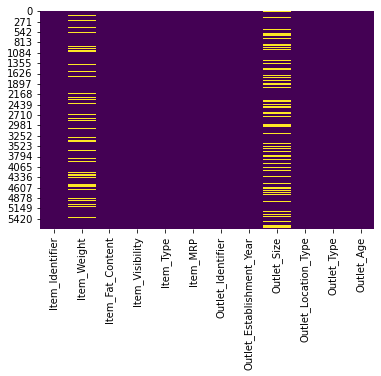

In [67]:
sns.heatmap(test.isnull(),cbar=False,cmap ='viridis')
plt.show()

### Observations: 
Null values are present for Item_Weight and Outlet_Size column.

#### Remove Null:

##### For Item_Weight:

In [68]:
print('Percent of missing "Item_Weight" records in test dataset is ', ((test['Item_Weight'].isnull().sum()/test.shape[0])*100))

Percent of missing "Item_Weight" records in test dataset is  17.180073930646014


In [69]:
meanweight=pd.DataFrame(test.groupby('Item_Type')['Item_Weight'].mean())
meanweight

Item_Weight
Item_Type                         
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household                13.270504
Meat                     12.702148
Others                   14.009725
Seafood                  13.241136
Snack Foods              12.684256
Soft Drinks              11.691965
Starchy Foods            13.618247

In [70]:
x= meanweight.index
y= meanweight.Item_Weight

# Item_Type values is keys and mean weight is values

mean=dict(zip(x,y))

# Make a new column "mean_weight" and maps values based on corresponding values of 'Item_Type'

test['mean_weight']=test['Item_Type'].map(mean)
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300          Regular         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  Outlet_Age  mean_weight  
0               Tier 1  Supermarket Type1          14    12.684256  
1               Tier 2  Supermarket Type1           6    12.955040  
2               Tier 3      Grocery Store          15    14.009725  
3               Tier 2  Supermarket Type1           6    12.684256  
4               Tier 3  Supermarket Type3          28    12.955040

In [71]:
#filling null values from mean_weight in 'Item_Weight'

test['Item_Weight']=test['Item_Weight'].fillna(test['mean_weight'])

In [72]:
test['Item_Weight'].isnull().sum()

0

In [73]:
test.drop(columns='mean_weight',inplace=True)

##### For Outlet_Size :

In [74]:
print('Percent of missing "Outlet_Size" records in test dataset is ', ((test['Outlet_Size'].isnull().sum()/test.shape[0])*100))

Percent of missing "Outlet_Size" records in test dataset is  28.269670832599896


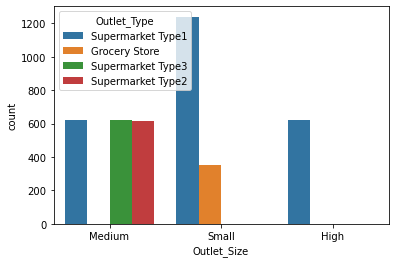

In [75]:
# visualise relation between Outlet_Size and Outlet_Type

sns.countplot('Outlet_Size',hue='Outlet_Type',data=test)
plt.show()

In [76]:
from scipy.stats import mode
mode_by_Outlet_Type= (lambda x:mode(x).mode[0]) 
mode_Outlet_size = test.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc= mode_by_Outlet_Type)
mode_Outlet_size

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [77]:
#filling null values from mode_Outlet_size in 'Outlet_Size'

os = test['Outlet_Size'].isnull() 
test.loc[os,'Outlet_Size'] = test.loc[os,'Outlet_Type'].apply(lambda x: mode_Outlet_size[x])

In [78]:
test['Outlet_Size'].isnull().sum()

0

#### Observations:
Replace NULL of Item_Weight column by mean weight of respective Item_Type

Replace NULL of Outlet_Size column by mode of respective Outlet_Type

## Exploratory Data Analysis of Training Data:

### Univariate Analysis:

In [79]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.057792   
4           NCD19         8.93          Low Fat         0.057792   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0  Supermarket Type1          3735.1380          14  
1  Supermarket Type2           443.4228           4  
2  Supermarket Type1          2097.2700          14  
3      Grocery Store           732.3800          15  
4  Supermarket Type1           994.7052          26

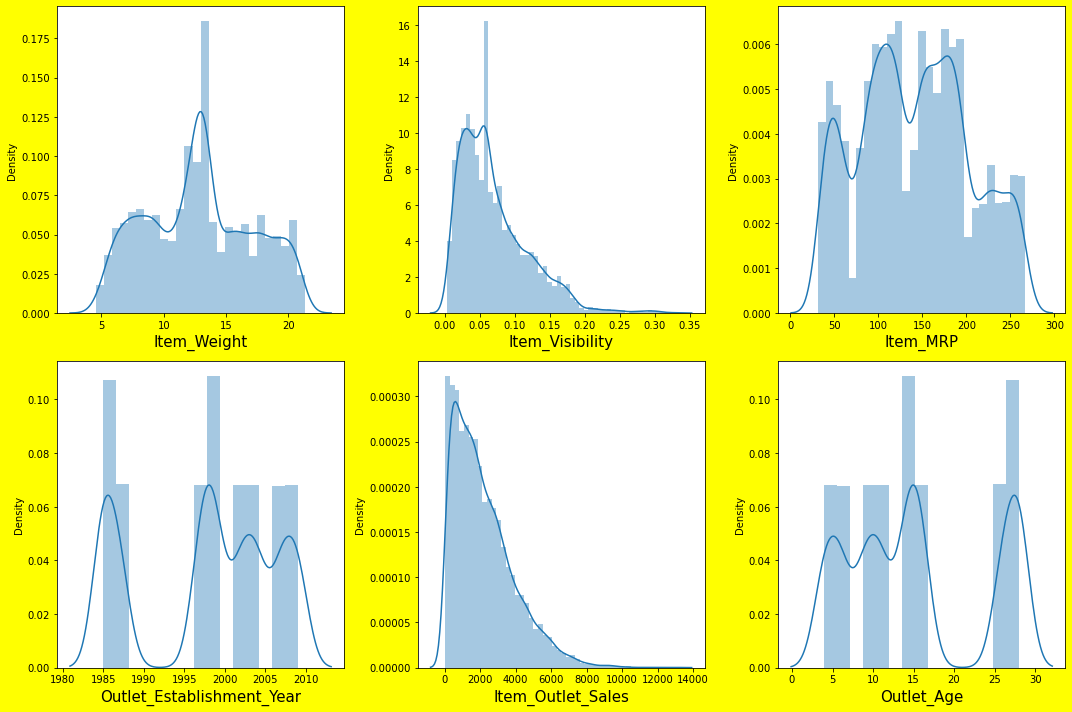

In [80]:
train1 =train.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type',
                            'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])                 
plt.figure(figsize=(15,10),facecolor='yellow')
plno=1
for x in train1:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.distplot(train1[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

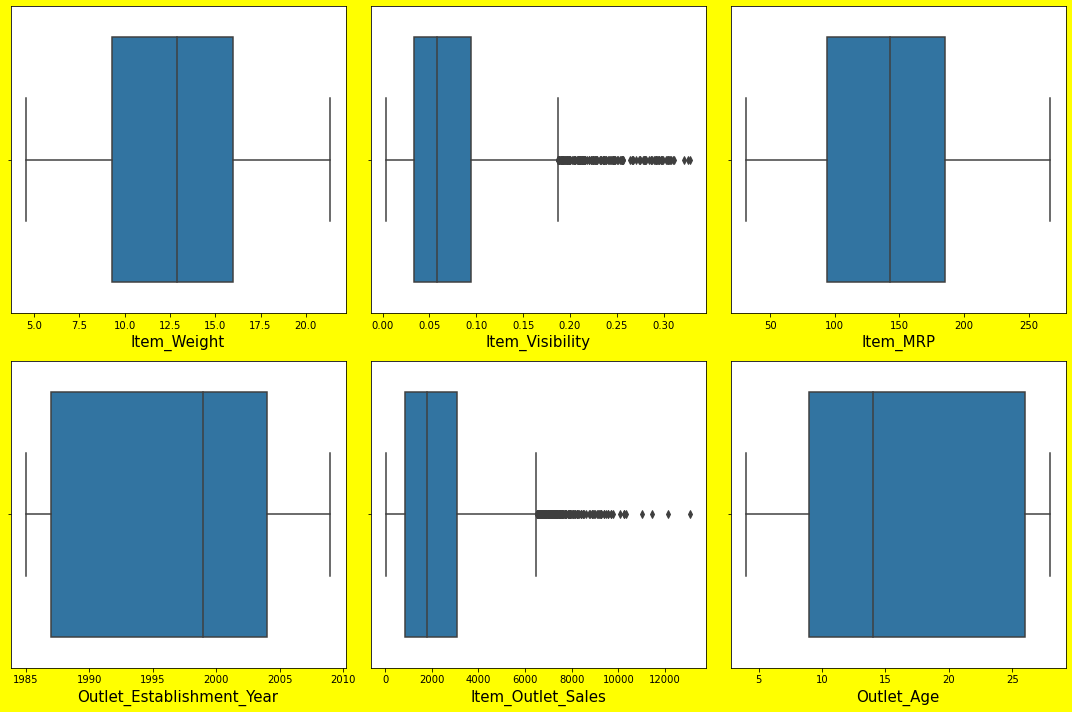

In [81]:
plt.figure(figsize=(15,10),facecolor='yellow')
plno=1
for x in train1:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.boxplot(train1[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()
plt.show()

#### Observatins: 
Item_Visibility and Item_Outlet_Sales has outliers.

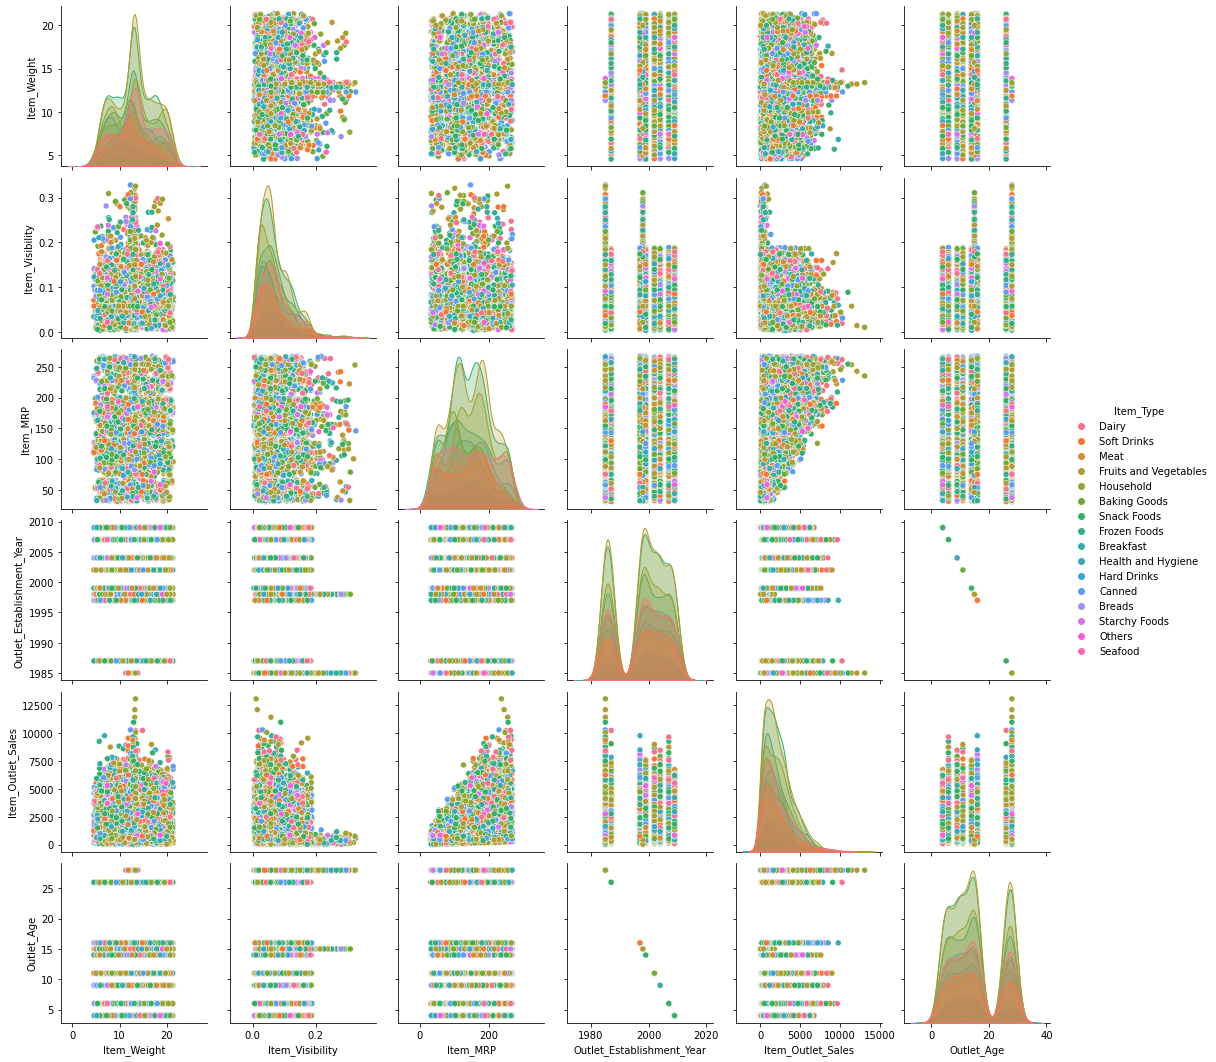

In [82]:
sns.pairplot(train, hue= "Item_Type")
plt.show()

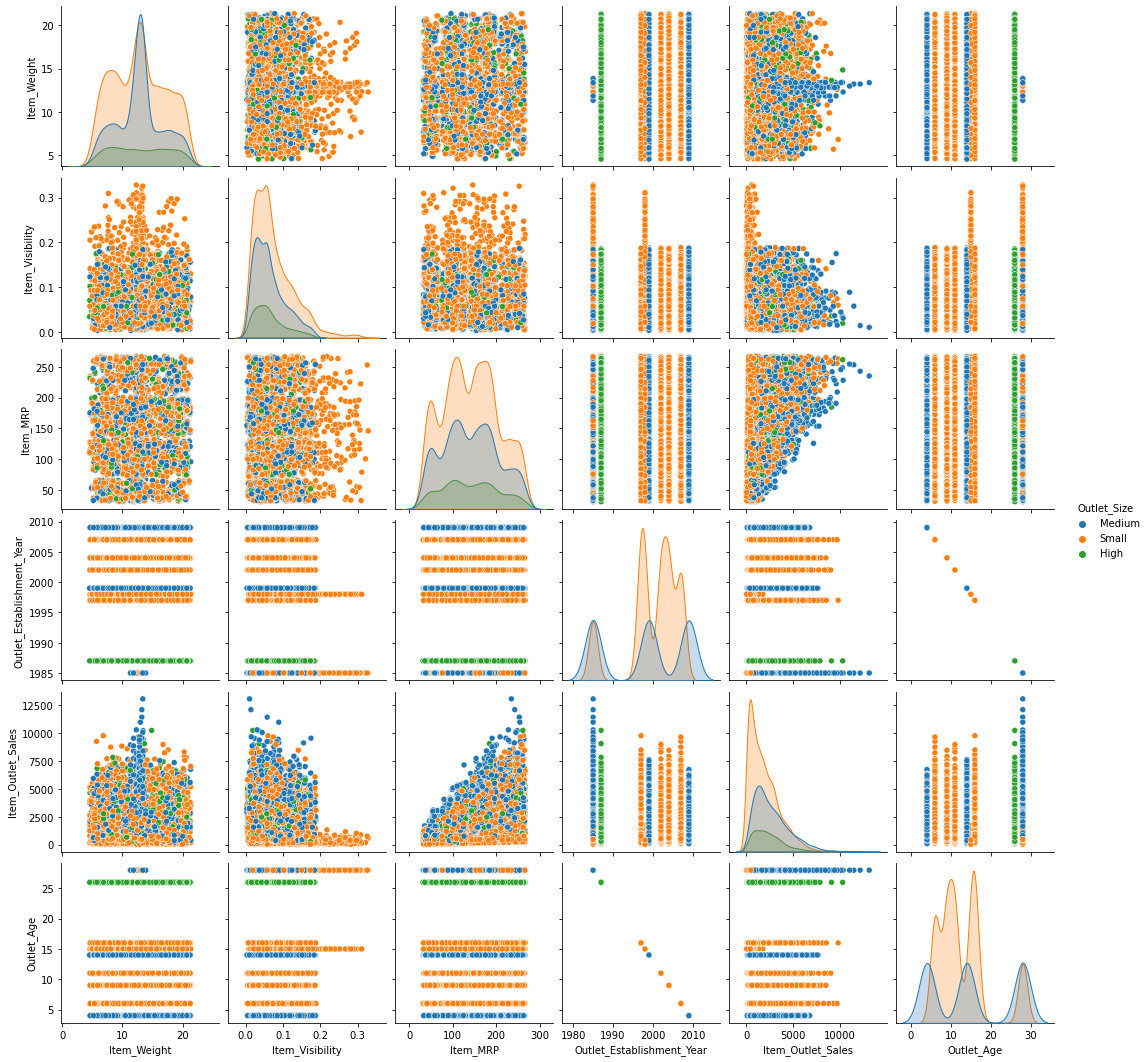

In [83]:
sns.pairplot(train, hue= "Outlet_Size")
plt.show()

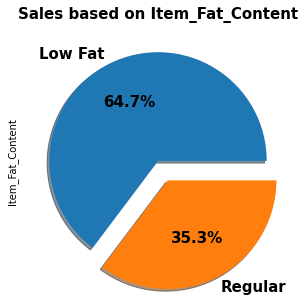

In [84]:
plt.figure(figsize=(10,5))
train['Item_Fat_Content'].value_counts().plot.pie(explode=[0,0.2],textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%',shadow=True)
plt.title("Sales based on Item_Fat_Content", fontsize= 15,fontweight= "bold" )
plt.show()

Most selling item is low fat

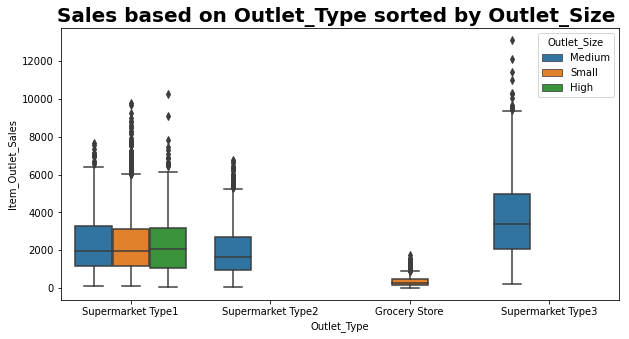

In [85]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "Outlet_Type",y = "Item_Outlet_Sales", data = train, hue= "Outlet_Size")
plt.title("Sales based on Outlet_Type sorted by Outlet_Size ", fontsize= 20,fontweight= "bold" )
plt.show()

#### Observations:

1. For Supermarket1, all types of outlet exists.
2. For Supermarket2, only medium exists.
3. For Grocery, the outlet size is small.
4. For Supermarket3,the  outlet size is medium.

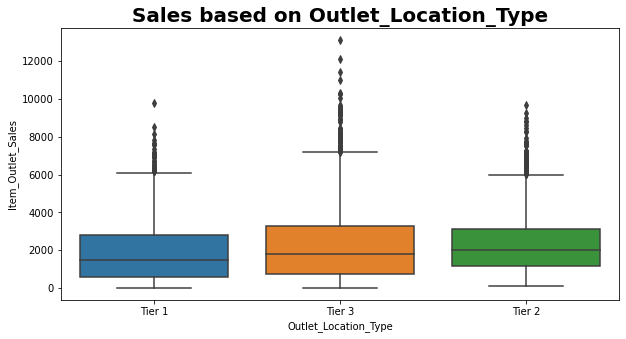

In [86]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "Outlet_Location_Type",y = "Item_Outlet_Sales", data = train)
plt.title("Sales based on Outlet_Location_Type", fontsize= 20,fontweight= "bold" )
plt.show()

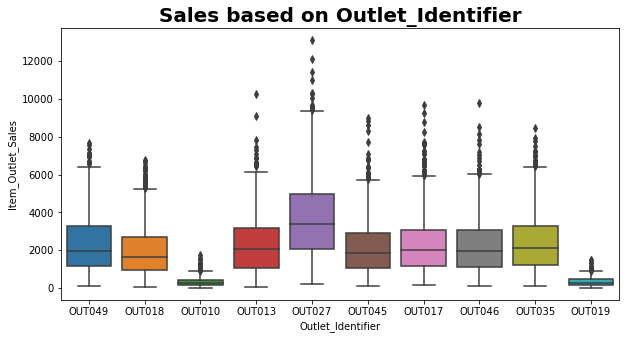

In [87]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "Outlet_Identifier",y = "Item_Outlet_Sales", data = train)
plt.title("Sales based on Outlet_Identifier", fontsize= 20,fontweight= "bold" )
plt.show()

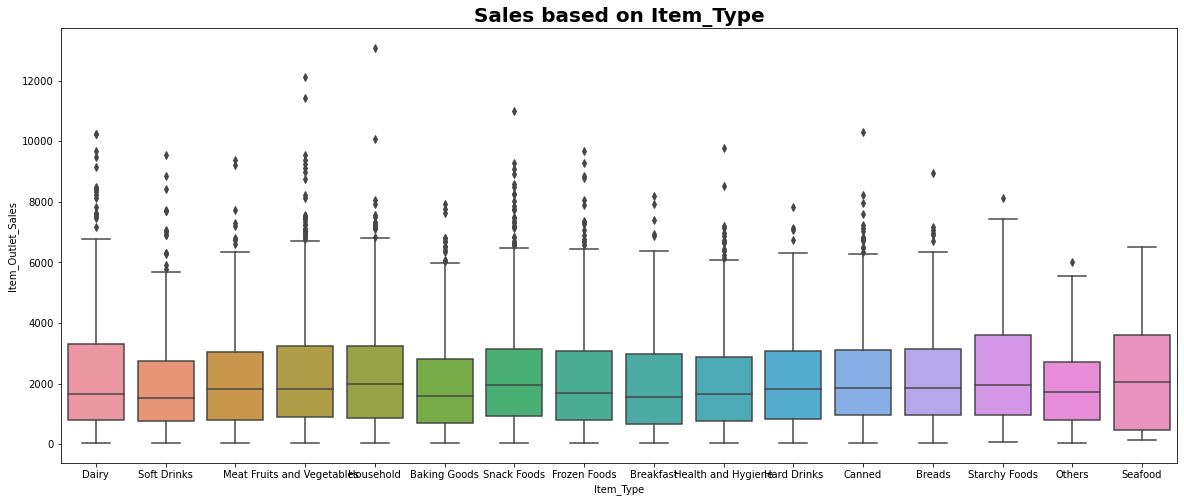

In [88]:
plt.figure(figsize = (20,8))
sns.boxplot(x = "Item_Type",y = "Item_Outlet_Sales", data = train)
plt.title("Sales based on Item_Type", fontsize= 20,fontweight= "bold" )
plt.show()

<Figure size 1440x720 with 0 Axes>

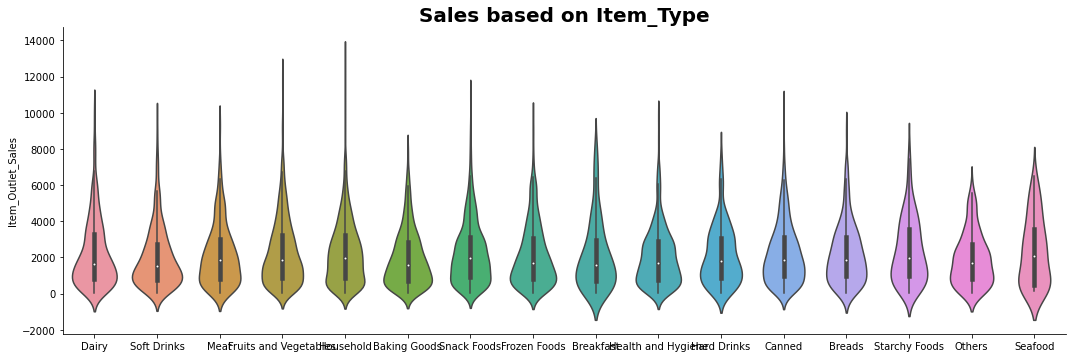

In [89]:
plt.figure(figsize =(20,10))
sns.catplot(x = 'Item_Type',y ='Item_Outlet_Sales',kind = 'violin',data = train, aspect=3)
plt.xlabel("",fontsize=20)
plt.title("Sales based on Item_Type", fontsize= 20,fontweight= "bold" )
plt.show()

<Figure size 1440x720 with 0 Axes>

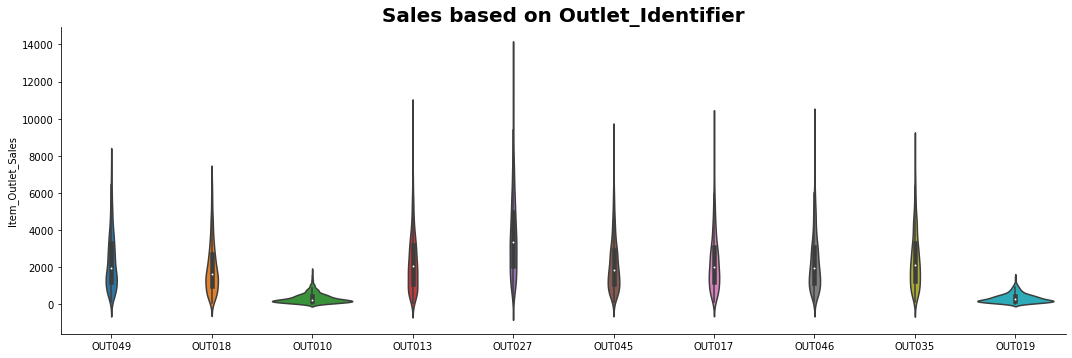

In [90]:
plt.figure(figsize =(20,10))
sns.catplot(x = 'Outlet_Identifier',y ='Item_Outlet_Sales',kind = 'violin',data = train, aspect=3)
plt.xlabel("",fontsize=20)
plt.title("Sales based on Outlet_Identifier", fontsize= 20,fontweight= "bold" )
plt.show()

<Figure size 1440x720 with 0 Axes>

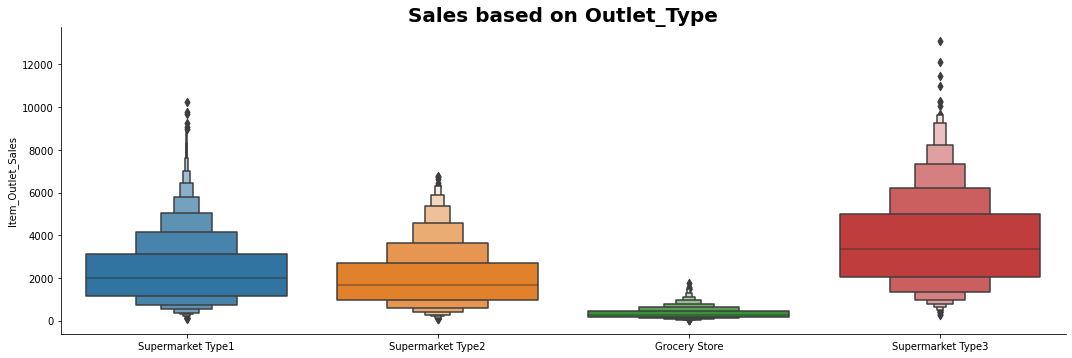

In [91]:
plt.figure(figsize =(20,10))
sns.catplot(x ='Outlet_Type',y = 'Item_Outlet_Sales',kind = 'boxen',data = train, aspect=3)
plt.xlabel("",fontsize=20)
plt.title("Sales based on Outlet_Type", fontsize= 20,fontweight= "bold" )
plt.show()

<Figure size 1440x720 with 0 Axes>

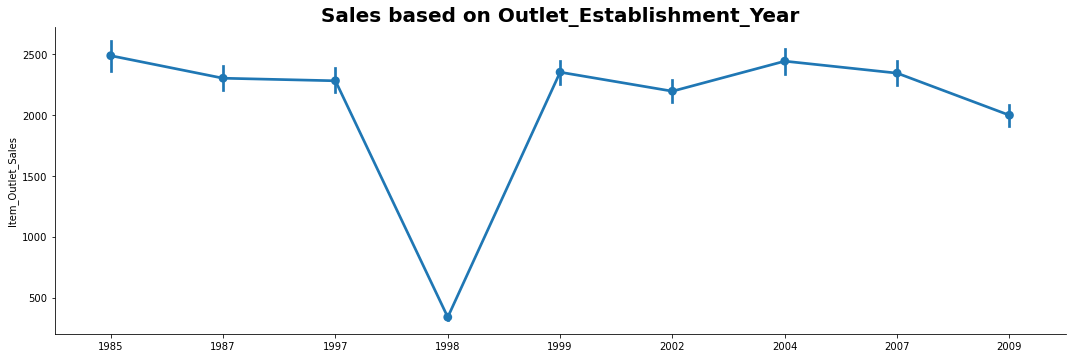

In [92]:
plt.figure(figsize =(20,10))
sns.catplot(x ='Outlet_Establishment_Year',y = 'Item_Outlet_Sales',kind = 'point',data = train, aspect=3)
plt.xlabel("",fontsize=20)
plt.title("Sales based on Outlet_Establishment_Year", fontsize= 20,fontweight= "bold" )
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

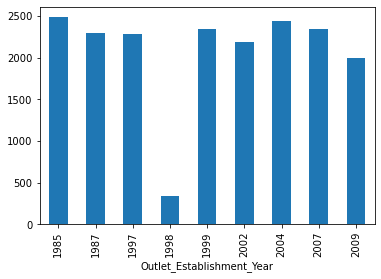

In [93]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

#### Observsations:

1. for establishment year 1998, the graph point is minimum
3. for OUT010, OUT019 has different datatype from others.
4. Tier 1 and Tier 3 locations of Outlet_Location_Type looks similar.

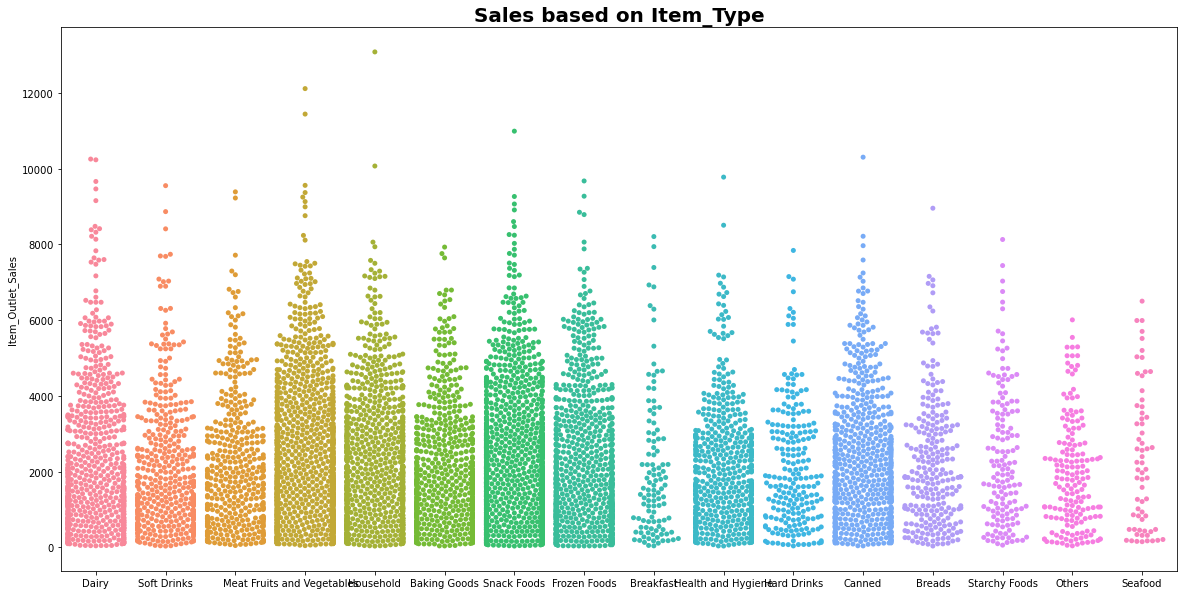

In [94]:
plt.figure(figsize = (20,10))
sns.swarmplot(x ="Item_Type", y = "Item_Outlet_Sales", data = train)
plt.title("Sales based on Item_Type", fontsize= 20,fontweight= "bold" )
plt.xlabel("", fontsize=20)
plt.show()

#### Observations:

Least selling item is seafood and breakfast

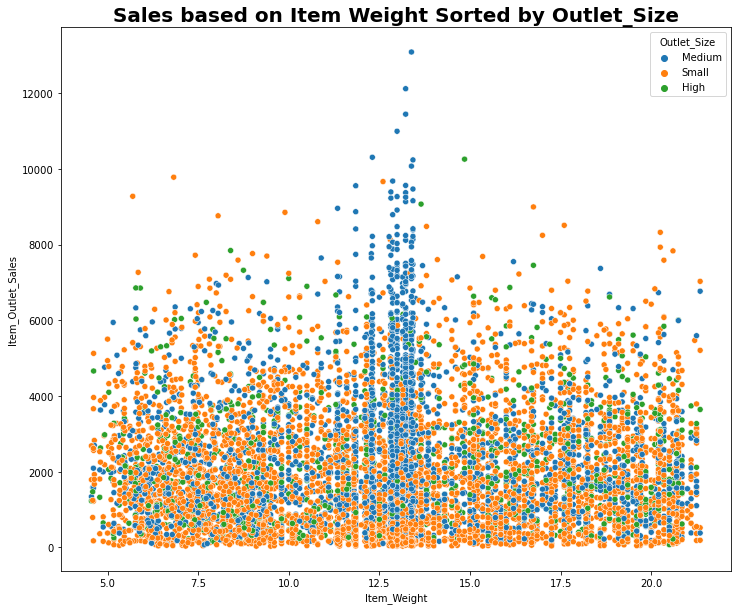

In [95]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Outlet_Size',data=train)
plt.title("Sales based on Item Weight Sorted by Outlet_Size", fontsize= 20,fontweight= "bold" )
plt.show()

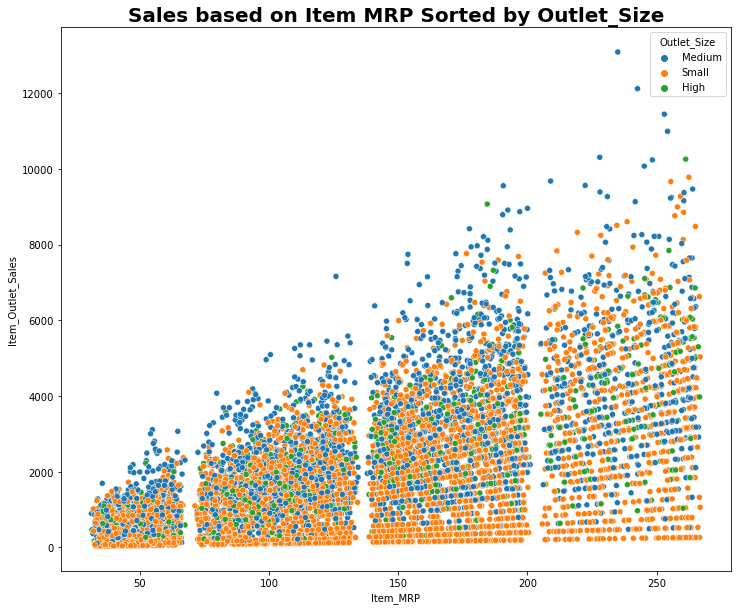

In [96]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales',hue='Outlet_Size',data=train)
plt.title("Sales based on Item MRP Sorted by Outlet_Size", fontsize= 20,fontweight= "bold" )
plt.show()

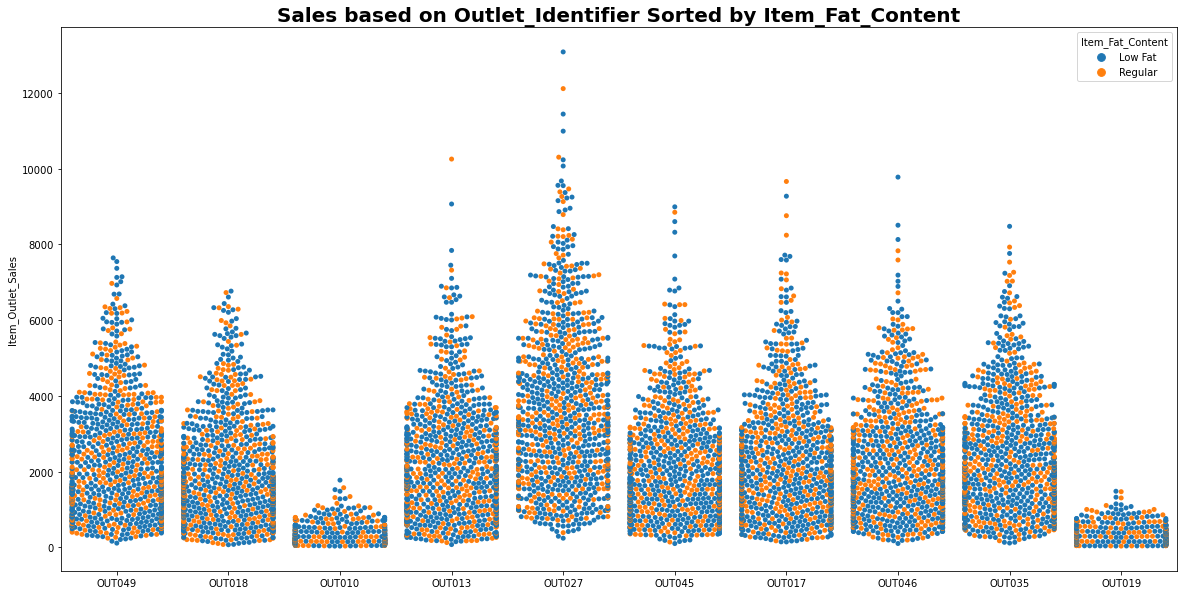

In [97]:
plt.figure(figsize = (20,10))
sns.swarmplot(x ="Outlet_Identifier", y = "Item_Outlet_Sales", hue="Item_Fat_Content", data = train)
plt.title("Sales based on Outlet_Identifier Sorted by Item_Fat_Content", fontsize=20, fontweight= "bold")
plt.xlabel("", fontsize=20)
plt.show()

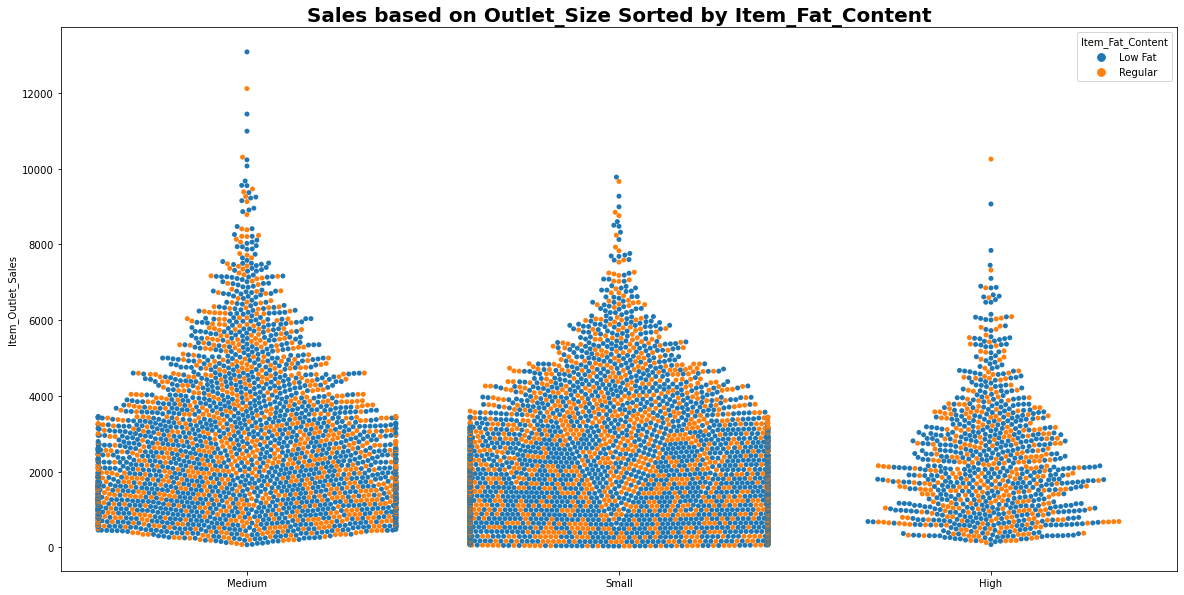

In [98]:
plt.figure(figsize = (20,10))
sns.swarmplot(x ="Outlet_Size", y = "Item_Outlet_Sales", hue="Item_Fat_Content", data = train)
plt.title("Sales based on Outlet_Size Sorted by Item_Fat_Content", fontsize=20, fontweight= "bold")
plt.xlabel("", fontsize=20)
plt.show()

#### Observations:
Max selling item is Low fat.

## Different statistical operation and analysis on Train data:

### Checking corrleation :

In [99]:
train.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.016573  0.025821   
Item_Visibility              -0.016573         1.000000 -0.004763   
Item_MRP                      0.025821        -0.004763  1.000000   
Outlet_Establishment_Year    -0.008376        -0.078328  0.005020   
Item_Outlet_Sales             0.012088        -0.134161  0.567574   
Outlet_Age                    0.008376         0.078328 -0.005020   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.008376           0.012088   
Item_Visibility                            -0.078328          -0.134161   
Item_MRP                                    0.005020           0.567574   
Outlet_Establishment_Year                   1.000000          -0.049135   
Item_Outlet_Sales                          -0.049135           1.000000   
Outlet_Age                                 -1.000000           0.049135   

                           Outlet_Age  
Item_Weight                  0.008376  
Item_Visibility              0.078328  
Item_MRP                    -0.005020  
Outlet_Establishment_Year   -1.000000  
Item_Outlet_Sales            0.049135  
Outlet_Age                   1.000000

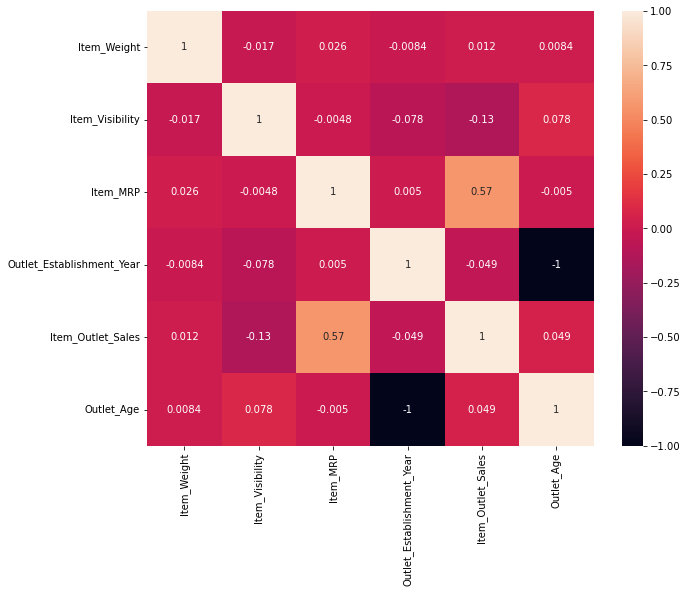

In [100]:
plt.subplots(figsize=(10,8))
sns.heatmap(train.corr(),annot= True, linecolor='black')
plt.show()

### Remove Outliers:

In [101]:
train.skew()

Item_Weight                  0.089537
Item_Visibility              1.310871
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Outlet_Age                   0.396641
dtype: float64

In [102]:
#1st quantile
q1= train. quantile(0.25)
#3rd quantile
q3= train. quantile(0.75)
#IQR
iqr= q3-q1
print(iqr)

Item_Weight                     6.6900
Item_Visibility                 0.0615
Item_MRP                       91.8172
Outlet_Establishment_Year      17.0000
Item_Outlet_Sales            2267.0490
Outlet_Age                     17.0000
dtype: float64


In [103]:
train_new =train [~((train <(q1 - 1.5*iqr)) | (train >(q3 + 1.5*iqr))).any(axis=1)]
train_new

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.057792   
4              NCD19        8.930          Low Fat         0.057792   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998       Small               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002       Small               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0     Supermarket Type1          3735.1380          14  
1     Supermarket Type2           443.4228           4  
2     Supermarket Type1          2097.2700          14  
3         Grocery Store           732.3800          15  
4     Supermarket Type1           994.7052          26  
...                 ...                ...         ...  
8518  Supermarket Type1          2778.3834          26  
8519  Supermarket Type1           549.2850          11  
8520  Supermarket Type1          1193.1136           9  
8521  Supermarket Type2          1845.5976           4  
8522  Supermarket Type1           765.6700          16  

[8164 rows x 13 columns]

#### Observations:

Remove overall (8523-8164)= 359 data for outliers

### Checking Skewness of features:

In [106]:
train_new.skew()

Item_Weight                  0.085535
Item_Visibility              0.817387
Item_MRP                     0.151467
Outlet_Establishment_Year   -0.439854
Item_Outlet_Sales            0.767719
Outlet_Age                   0.439854
dtype: float64

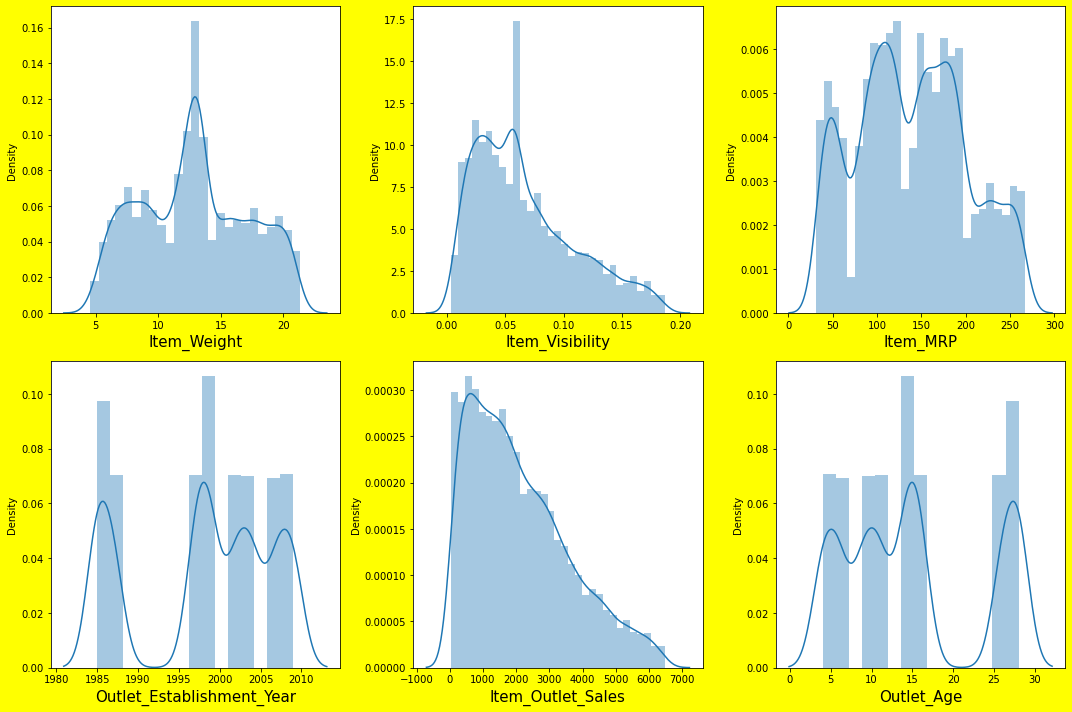

In [107]:
train1 =train_new.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type',
                            'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])                 
plt.figure(figsize=(15,10),facecolor='yellow')
plno=1
for x in train1:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.distplot(train1[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

#### Observations:

Still there is a skewness in Item_Visibility and Item_Outlet_Sales. Need to remove this by data trasformation.

### Transforming right skewed data using boxcox transformation:

In [108]:
from scipy.stats import boxcox
train_new['Item_Visibility']=boxcox(train_new['Item_Visibility'],0.5)
train_new['Item_Outlet_Sales']=boxcox(train_new['Item_Outlet_Sales'],0.5)

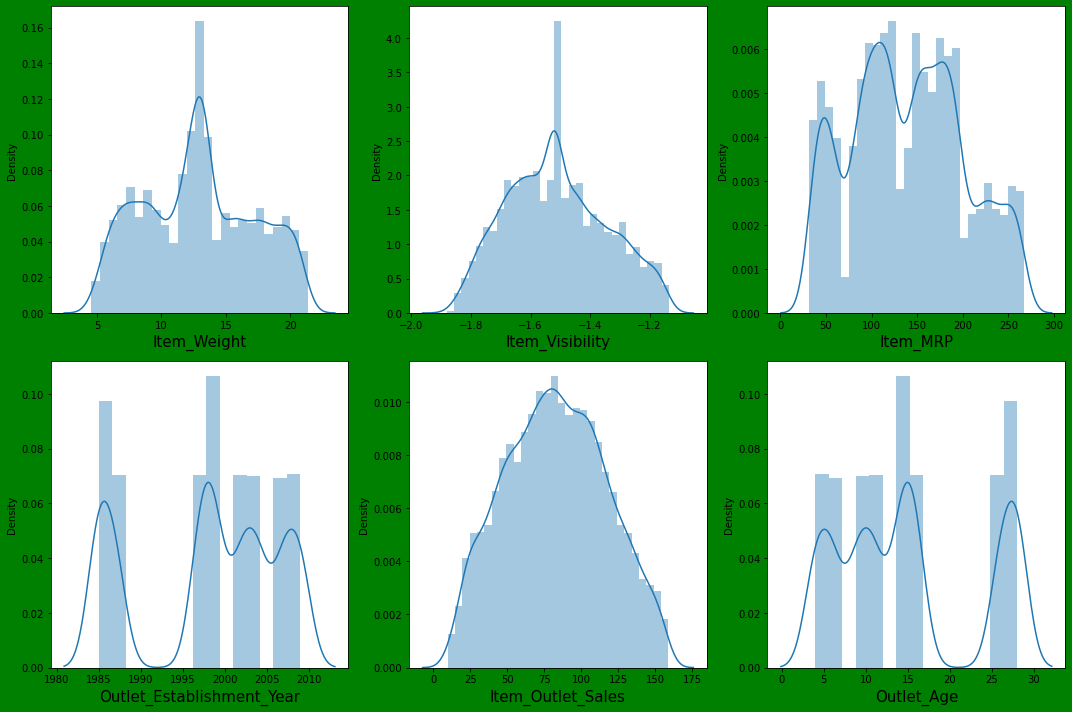

In [110]:
train1 =train_new.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type',
                            'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])                 
plt.figure(figsize=(15,10),facecolor='green')
plno=1
for x in train1:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.distplot(train1[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

#### Observations:

Remove right skewness from Item_Visibility and Item_Outlet_Sales

### Encoding the Categorical Features:

#### Label Encoding:

In [112]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [113]:
train_new['Item_Fat_Content']=le.fit_transform(train_new['Item_Fat_Content'])

train_new['Item_Type']=le.fit_transform(train_new['Item_Type'])

train_new['Outlet_Identifier']=le.fit_transform(train_new['Outlet_Identifier'])

train_new['Outlet_Size']=le.fit_transform(train_new['Outlet_Size'])

train_new['Outlet_Location_Type']=le.fit_transform(train_new['Outlet_Location_Type'])

train_new['Outlet_Type']=le.fit_transform(train_new['Outlet_Type'])

In [114]:
train_new_save= train_new.copy()

### Data cleaning:

Remove unwanted column from the dataset.

In [116]:
train_new=train_new.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier'])

In [117]:
train_new.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0      9.30000                 0        -1.746644          4  249.8092   
1      5.92000                 1        -1.722308         14   48.2692   
2     17.50000                 0        -1.741079         10  141.6180   
3     19.20000                 1        -1.519199          6  182.0950   
4      8.93000                 0        -1.519199          9   53.8614   
5     10.39500                 1        -1.519199          0   51.4008   
6     13.65000                 1        -1.774247         13   57.6588   
7     12.98788                 0        -1.285942         13  107.7622   
8     16.20000                 1        -1.741643          5   96.9726   
9     19.20000                 1        -1.385347          5  187.8214   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                  9            1                     0            1   
1                  3            1                     2            2   
2                  9            1                     0            1   
3                  0            2                     2            0   
4                  1            0                     2            1   
5                  3            1                     2            2   
6                  1            0                     2            1   
7                  5            1                     2            3   
8                  7            2                     1            1   
9                  2            2                     1            1   

   Item_Outlet_Sales  Outlet_Age  
0         120.231551          14  
1          40.115213           4  
2          89.591921          14  
3          52.125040          15  
4          61.077895          26  
5          45.185116           4  
6          35.070355          26  
7         124.850520          28  
8          63.623124          11  
9         135.266675           6

In [118]:
train_new.shape

(8164, 11)

### Checking Multicollinearity:

In [119]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(train_new,i)for i in range(train_new.shape[1])]
vif["Features"] = train_new.columns
vif

VIF              Features
0    9.538671           Item_Weight
1    1.556653      Item_Fat_Content
2   38.834404       Item_Visibility
3    4.003529             Item_Type
4   10.159828              Item_MRP
5   14.021924     Outlet_Identifier
6    7.754286           Outlet_Size
7   12.932834  Outlet_Location_Type
8    9.583133           Outlet_Type
9   14.483509     Item_Outlet_Sales
10   4.770044            Outlet_Age

### Correlation after Encoding:

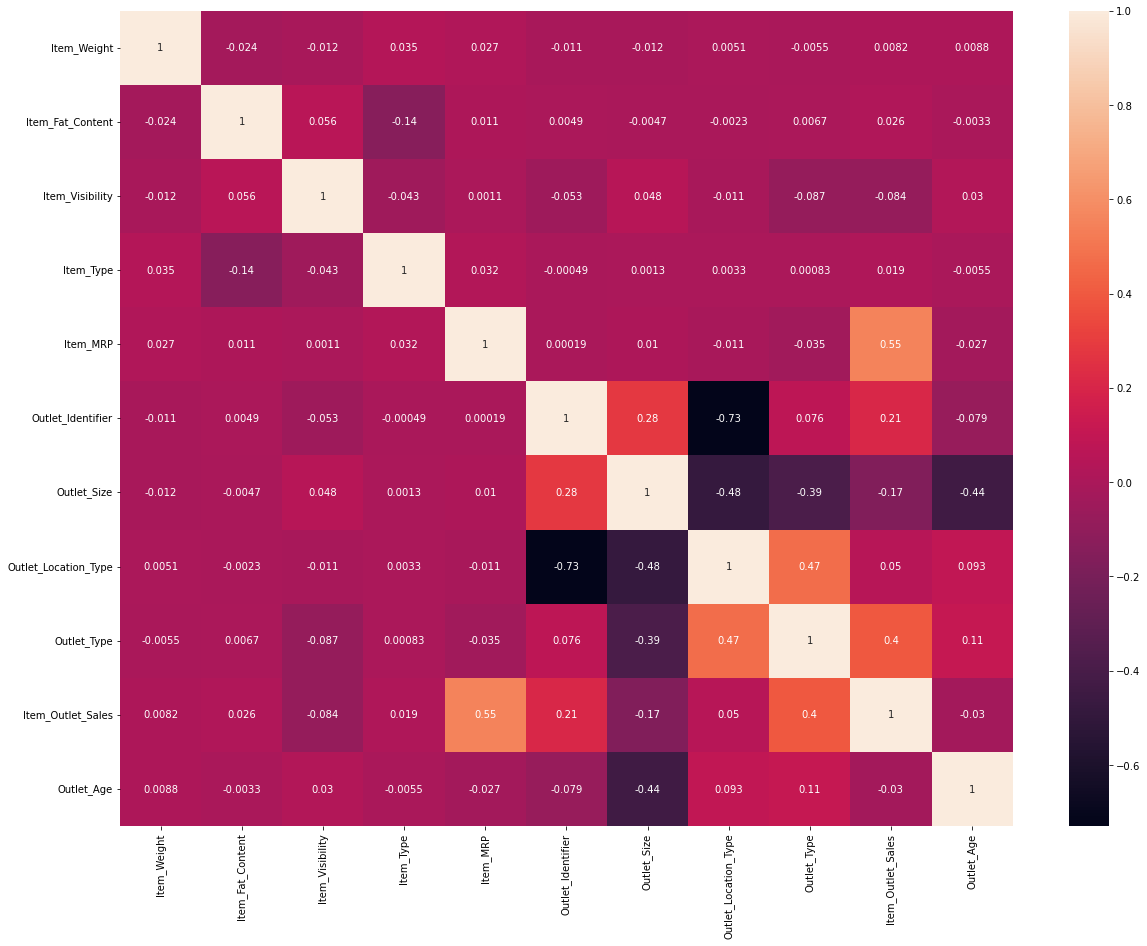

In [124]:
plt.subplots(figsize=(20,15))
sns.heatmap(train_new.corr(),annot= True)
plt.show()

## Different statistical operation and analysis on Test data:

### Checking corrleation :

In [125]:
test.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014930  0.046071   
Item_Visibility              -0.014930         1.000000 -0.014238   
Item_MRP                      0.046071        -0.014238  1.000000   
Outlet_Establishment_Year     0.013976        -0.103756 -0.007233   
Outlet_Age                   -0.013976         0.103756  0.007233   

                           Outlet_Establishment_Year  Outlet_Age  
Item_Weight                                 0.013976   -0.013976  
Item_Visibility                            -0.103756    0.103756  
Item_MRP                                   -0.007233    0.007233  
Outlet_Establishment_Year                   1.000000   -1.000000  
Outlet_Age                                 -1.000000    1.000000

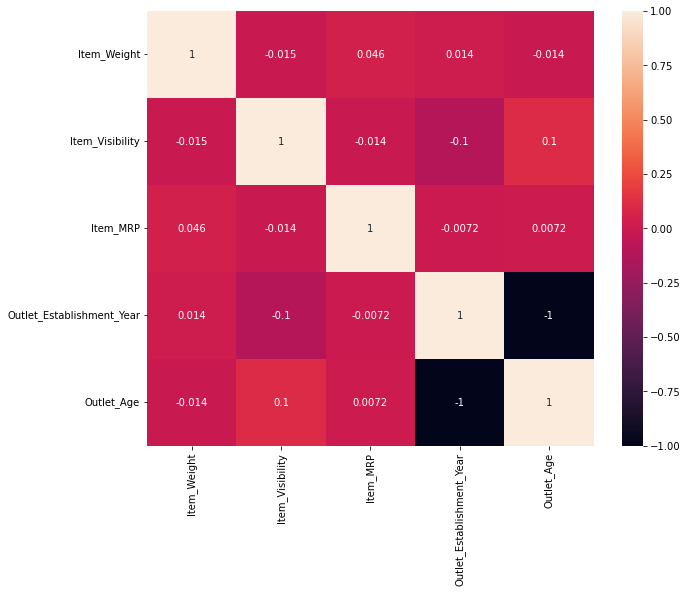

In [126]:
plt.subplots(figsize=(10,8))
sns.heatmap(test.corr(),annot= True, linecolor='black')
plt.show()

### Remove Outliers:

In [127]:
test.skew()

Item_Weight                  0.142604
Item_Visibility              1.395046
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Age                   0.396306
dtype: float64

In [128]:
#1st quantile
q1= test. quantile(0.25)
#3rd quantile
q3= test. quantile(0.75)
#IQR
iqr= q3-q1
print(iqr)

Item_Weight                   6.655000
Item_Visibility               0.060255
Item_MRP                     91.614600
Outlet_Establishment_Year    17.000000
Outlet_Age                   17.000000
dtype: float64


In [129]:
test_new =test[~((test <(q1 - 1.5*iqr)) | (test >(q3 + 1.5*iqr))).any(axis=1)]
test_new

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58     20.75000          Low Fat         0.007565   
1              FDW14      8.30000          Regular         0.038428   
2              NCN55     14.60000          Low Fat         0.099575   
3              FDQ58      7.31500          Low Fat         0.015388   
4              FDY38     12.95504          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58     10.50000          Regular         0.013496   
5677           FDD47      7.60000          Regular         0.142991   
5678           NCO17     10.00000          Low Fat         0.073529   
5679           FDJ26     15.30000          Regular         0.057957   
5680           FDU37      9.50000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007       Small               Tier 2   
2                          1998       Small               Tier 3   
3                          2007       Small               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002       Small               Tier 2   
5679                       2007       Small               Tier 2   
5680                       2002       Small               Tier 2   

            Outlet_Type  Outlet_Age  
0     Supermarket Type1          14  
1     Supermarket Type1           6  
2         Grocery Store          15  
3     Supermarket Type1           6  
4     Supermarket Type3          28  
...                 ...         ...  
5676  Supermarket Type1          16  
5677  Supermarket Type2           4  
5678  Supermarket Type1          11  
5679  Supermarket Type1           6  
5680  Supermarket Type1          11  

[5547 rows x 12 columns]

total (5681-5547)= 134 data are deleted for outliers

### Checking Skewness of features:

In [132]:
test_new.skew()

Item_Weight                  0.140897
Item_Visibility              0.807693
Item_MRP                     0.131380
Outlet_Establishment_Year   -0.417330
Outlet_Age                   0.417330
dtype: float64

In [134]:
test_new.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age'],
      dtype='object')

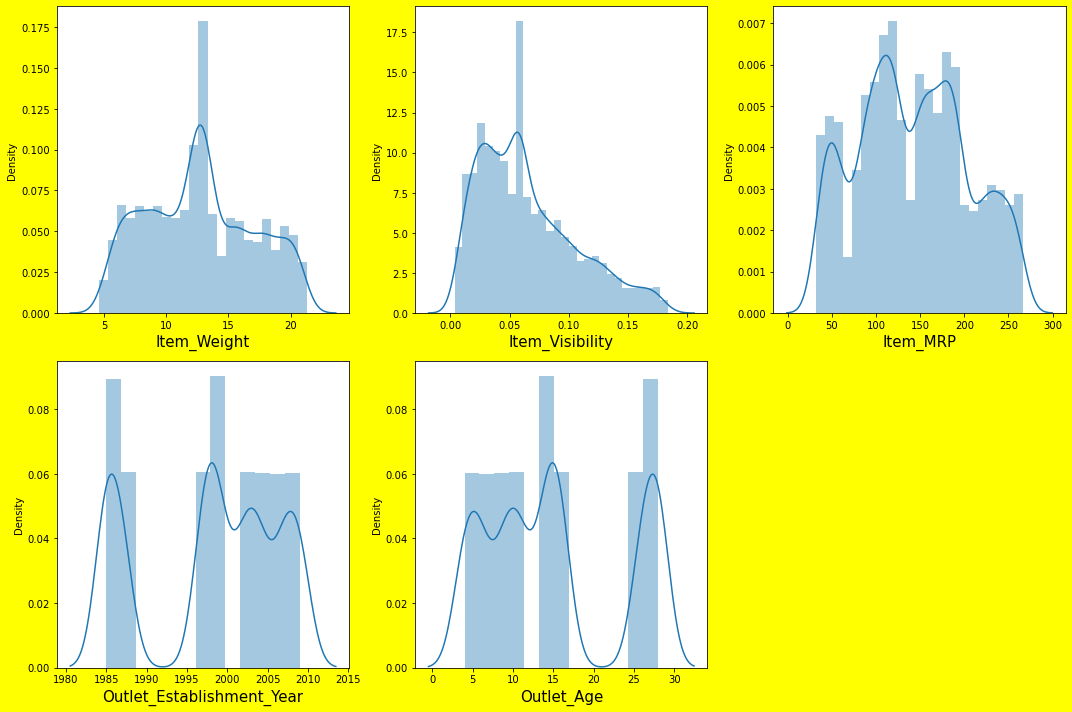

In [135]:
test1 =test_new.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type',
                            'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])                 
plt.figure(figsize=(15,10),facecolor='yellow')
plno=1
for x in test1:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.distplot(test1[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

#### Observations:

Still there is a skewness in Item_Visibility. Need to remove this by data trasformation.

### Transforming right skewed data using boxcox transformation

In [136]:
test_new['Item_Visibility']=boxcox(test_new['Item_Visibility'],0.5)

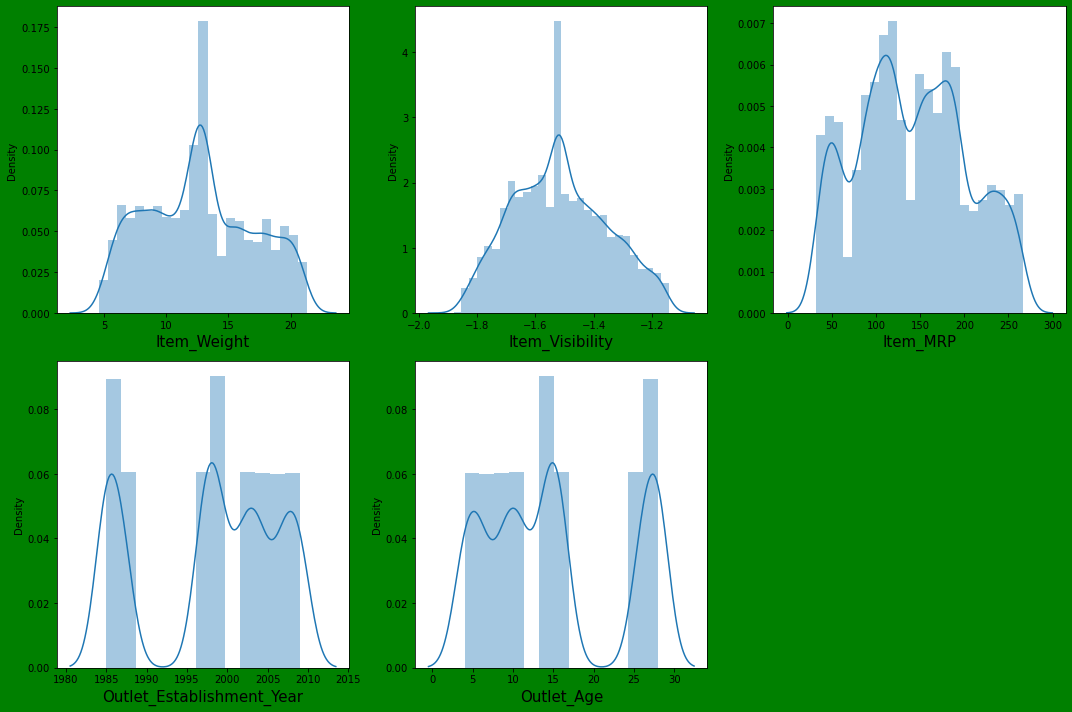

In [137]:
test1 =test_new.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type',
                            'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])                 
plt.figure(figsize=(15,10),facecolor='green')
plno=1
for x in test1:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.distplot(test1[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

### Encoding the Categorical Features by Label encoder:

In [138]:
test_new['Item_Fat_Content']=le.fit_transform(test_new['Item_Fat_Content'])

test_new['Item_Type']=le.fit_transform(test_new['Item_Type'])

test_new['Outlet_Identifier']=le.fit_transform(test_new['Outlet_Identifier'])

test_new['Outlet_Size']=le.fit_transform(test_new['Outlet_Size'])

test_new['Outlet_Location_Type']=le.fit_transform(test_new['Outlet_Location_Type'])

test_new['Outlet_Type']=le.fit_transform(test_new['Outlet_Type'])

In [139]:
test_new_save= test_new.copy()

### Data cleaning:

Remove unwanted column from the dataset.

In [141]:
test_new= test_new.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier'])
test_new

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0        20.75000                 0        -1.826048         13  107.8622   
1         8.30000                 1        -1.607940          4   87.3198   
2        14.60000                 0        -1.368890         11  241.7538   
3         7.31500                 0        -1.751900         13  155.0340   
4        12.95504                 1        -1.311235          4  234.2300   
...           ...               ...              ...        ...       ...   
5676     10.50000                 1        -1.767651         13  141.3154   
5677      7.60000                 1        -1.243717         15  169.1448   
5678     10.00000                 0        -1.457677          8  118.7440   
5679     15.30000                 1        -1.518516          3  214.6218   
5680      9.50000                 1        -1.352790          3   79.7960   

      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                     9            1                     0            1   
1                     2            2                     1            1   
2                     0            2                     2            0   
3                     2            2                     1            1   
4                     5            1                     2            3   
...                 ...          ...                   ...          ...   
5676                  8            2                     0            1   
5677                  3            1                     2            2   
5678                  7            2                     1            1   
5679                  2            2                     1            1   
5680                  7            2                     1            1   

      Outlet_Age  
0             14  
1              6  
2             15  
3              6  
4             28  
...          ...  
5676          16  
5677           4  
5678          11  
5679           6  
5680          11  

[5547 rows x 10 columns]

In [142]:
test_new.shape

(5547, 10)

### Checking Multicollinearity:

In [143]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(test_new,i)for i in range(test_new.shape[1])]
vif["Features"] = test_new.columns
vif

VIF              Features
0   9.440291           Item_Weight
1   1.570230      Item_Fat_Content
2  37.595017       Item_Visibility
3   4.029667             Item_Type
4   6.086769              Item_MRP
5  13.821585     Outlet_Identifier
6   7.654876           Outlet_Size
7  13.152108  Outlet_Location_Type
8   8.668645           Outlet_Type
9   4.738953            Outlet_Age

### Correlation after Encoding:

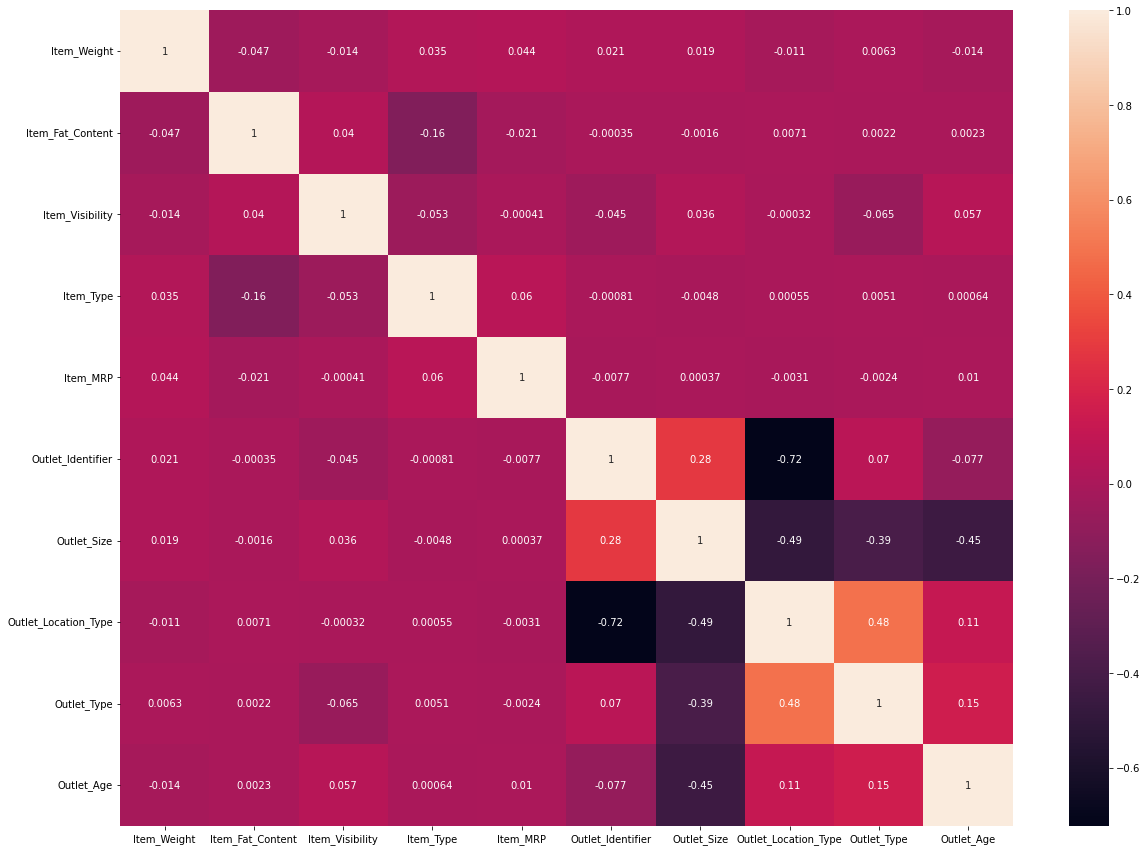

In [144]:
plt.subplots(figsize=(20,15))
sns.heatmap(test_new.corr(),annot= True)
plt.show()

### Data Standarization :

#### For Train data:

In [145]:
train_new.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0        -1.746644          4  249.8092   
1         5.92                 1        -1.722308         14   48.2692   
2        17.50                 0        -1.741079         10  141.6180   
3        19.20                 1        -1.519199          6  182.0950   
4         8.93                 0        -1.519199          9   53.8614   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                  9            1                     0            1   
1                  3            1                     2            2   
2                  9            1                     0            1   
3                  0            2                     2            0   
4                  1            0                     2            1   

   Item_Outlet_Sales  Outlet_Age  
0         120.231551          14  
1          40.115213           4  
2          89.591921          14  
3          52.125040          15  
4          61.077895          26

In [146]:
#seperate Features(x) and Lable(y)

x=train_new.drop(columns=['Item_Outlet_Sales'])
y=train_new['Item_Outlet_Sales']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#data standarization

x_scale_train= scaler.fit_transform(x)

#### For Test data:

In [147]:
x_scale_test = scaler.fit_transform(test_new)

### Final predictions using different Regression ML Models:

##### As target is a continuous numerical datatype, the problem s a Regression Problem.

#### Find best Random state:

In [148]:
from sklearn.linear_model import LinearRegression

r2_max=0
random_max=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_train,y,test_size = 0.3, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.5578657004469042 on Random_state 528


In [149]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (5714, 10)
Training target shape: (5714,)
Test feature shape: (2450, 10)
Test target shape: (2450,)


### Using LinearRegression()

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x_scale_train,y,test_size = 0.3, random_state=528)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5578657004469042
Mean absolute error: 18.181326603347998
Mean square error: 518.5984111842572
Root mean square error: 22.772755897876245


#### Using GridSearchCV:

In [151]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
print("Best params", grid_lin.best_params_)

Best params {'fit_intercept': 'True', 'n_jobs': 1}


In [152]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5578657004469042
Mean absolute error: 18.181326603347998
Mean square error: 518.5984111842572
Root mean square error: 22.772755897876245


#### Observations:

No such improvement seen after GridSearchCV.

### Using DecisionTreeRegressor():

In [153]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.2638130553325301
Mean absolute error: 22.63279876356559
Mean square error: 863.5054557518988
Root mean square error: 29.385463340772745


#### Using GridSearchCV:

In [155]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'min_samples_split' : range(1,3),
    'min_samples_leaf' : range(1,3)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'absolute_error', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [156]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.3766433201727253
Mean absolute error: 20.828126703006024
Mean square error: 731.1619661407806
Root mean square error: 27.040006770353823


#### Observations:

score is improved after GridSearchCV.

### Using KNeighborsRegressor():

In [160]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(20,30):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)


RMSE value for k=  21 is: 20.629946868862483
RMSE value for k=  22 is: 20.6033446067034
RMSE value for k=  23 is: 20.60250966440495
RMSE value for k=  24 is: 20.589791155151623
RMSE value for k=  25 is: 20.604448988693353
RMSE value for k=  26 is: 20.591546268104594
RMSE value for k=  27 is: 20.595418207396186
RMSE value for k=  28 is: 20.59291969983151
RMSE value for k=  29 is: 20.600912102669973
RMSE value for k=  30 is: 20.608428323495186


In [161]:
min(rmse_val)

20.589791155151623

#### For k=24 we get the best RMSE value for KNeighborsRegressor()

In [162]:
knn =KNeighborsRegressor(n_neighbors= 24)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6385677438259486
Mean absolute error: 16.069521494275936
Mean square error: 423.93949981276006
Root mean square error: 20.589791155151623


#### Using GridSearchCV

In [163]:
param = {'algorithm' : ['kd_tree','brute'],
             'leaf_size' : [30,12,15], 'n_jobs':[1,-1],
             'n_neighbors' : [24],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'kd_tree', 'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 24, 'weights': 'distance'}


In [164]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6401541014895471
Mean absolute error: 15.980613375220365
Mean square error: 422.0787924106344
Root mean square error: 20.544556271933313


#### Observations:


Score is slightly improved after GridSearchCV.

### Using RandomForestRegressor():

In [165]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6387769635362885
Mean absolute error: 15.853249045753962
Mean square error: 423.6940969804524
Root mean square error: 20.583830959771614


#### Using GridSearchCV:

In [168]:
params = {'n_estimators' : [100,120],'min_samples_split' : [3,2,1], 'min_samples_leaf' : [1,2]}

rf_grd = GridSearchCV(rf, param_grid = params)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}


In [170]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.645792336758397
Mean absolute error: 15.684959136114054
Mean square error: 415.4654628063396
Root mean square error: 20.382969921145925


#### Observations:

not improved after GridSearchCV.
### Using Support Vector Regression():

In [171]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6495767458865309
Mean absolute error: 15.957447746678206
Mean square error: 411.0265659301977
Root mean square error: 20.27379012247581


#### Using GridSearchCV:

In [172]:
params = {'kernel':['rbf','linear', 'poly'], 'gamma':['scale', 'auto'],'C':[0.2,0.1,0.01] }

svr_grd = GridSearchCV(svr, param_grid = params, cv= 5)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [173]:
svr_best = svr_grd.best_estimator_
svr_best.fit(x_train, y_train)

y_pred = svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5566843320063577
Mean absolute error: 18.182409184176482
Mean square error: 519.9840892393411
Root mean square error: 22.803159632808367


#### Observations:


nothig is improved after GridSearchCV.

### Using GradientBoostingRegressor()

In [174]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.676829967621718
Mean absolute error: 15.079742070811697
Mean square error: 379.0600853703174
Root mean square error: 19.469465461853783


#### Using GridSearchCV:

In [175]:
params = {'n_estimators':[250,150,200], 'learning_rate': [0.01,0.001, 0.02],
          'criterion':['friedman_mse', 'squared_error'],
         'subsample': [0.5, 0.3, 0.1]}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'criterion': 'friedman_mse', 'learning_rate': 0.02, 'n_estimators': 250, 'subsample': 0.5}


In [176]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6771791400745015
Mean absolute error: 15.09933121983415
Mean square error: 378.6505259232763
Root mean square error: 19.458944625114597


#### Observations:
r2 score, RMSE are slightly improved after GridSearchCV.

### UsingAdaboostRegressor:

In [185]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6463509183930842
Mean absolute error: 15.880576828973826
Mean square error: 414.81027828761233
Root mean square error: 20.366891718856177


#### Using GridSearchCV:

In [189]:
params = {'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.02,1] ,
        'n_estimators':[50,90,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 90}


In [190]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6441586492841737
Mean absolute error: 15.887192795282086
Mean square error: 417.38168538703553
Root mean square error: 20.429921326011893


#### Observations:

No improvement seen after Gridsearch

### Using XGBoost():

In [188]:
from xgboost import XGBRegressor

xgb= XGBRegressor()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6241688530861699
Mean absolute error: 16.33458085845569
Mean square error: 440.82858050162037
Root mean square error: 20.995918186676676


#### As per 8 different regression model we can see the the model with maximum R2 score and minimum RMSE value is GradientBoostingRegressor(). 

Let's check the cross validation score before final prediction.

### Cross Validation:

In [193]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , grid_knn_best , rf , svr , grid_gbdt_best , ada, xgb ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale_train ,y, cv =3)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [0.52724669 0.52244382 0.52367874]

Mean CV Score : 0.5244564159226442

Std deviation : 0.0020364181574248352

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=2)

 Cross Validation Score :  [0.34396335 0.36390286 0.35631408]

Mean CV Score : 0.35472676374974005

Std deviation : 0.008217289369703083

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(algorithm='kd_tree', n_jobs=1, n_neighbors=24,
                    weights='distance')

 Cross Validation Score :  [0.60338337 0.61516519 0.62842404]

Mean CV Score : 0.6156575340313707

Std deviation : 0.010228735414746906

-----------
-----------
Cross Validation Score of : RandomForestRegressor()

 Cross Validation Score :  [0.58917983 0.61224653 0.61704313]

Mean CV Score : 0.6061564957025263

Std deviation : 0.012162983935057499

-----------
-----------
Cross Validation S

#### Observations:

As per 8 different regression model we can see the the model with maximum cv score and max mean cv score value is for GradientBoostingRegressor().

### Checking overfitting problem:

In [194]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha

0.13205432987034751

In [195]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.557021596952388


Not overfitted.

### Conclusion:
#### As per 8 different regression model we can see the the model with maximum Mean CV Score is  0.653761037281701 and it is for GradientBoostingRegressor().
### Our final model is GradientBoostingRegressor() for this particular dataset

In [196]:
y_pred = grid_gbdt_best.predict(x_test)
y_pred

array([ 96.10388178, 106.6895287 ,  94.89405699, ..., 110.06270345,
        67.52247372,  39.02297712])

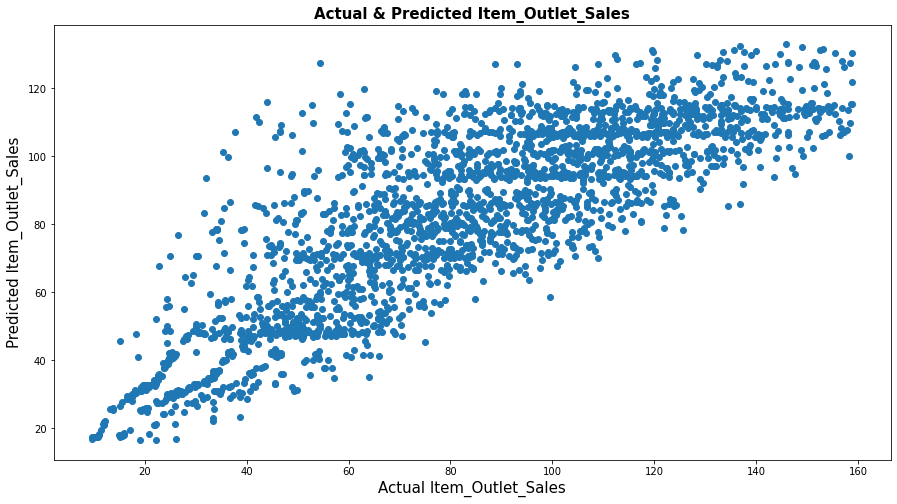

In [203]:
# Let's visualize the variation of actual test data and predicted data

plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Item_Outlet_Sales", fontsize= 15)
plt.ylabel("Predicted Item_Outlet_Sales",fontsize= 15)
plt.title("Actual & Predicted Item_Outlet_Sales" , fontsize= 15, fontweight= 'bold')
plt.show()

In [204]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.6771791400745015

Final Mean absolute error: 15.09933121983415

Final Mean square error: 378.6505259232763

Final Root mean square error: 19.458944625114597


### Best Feature Selection:

In [206]:
grid_gbdt_best.feature_importances_

array([6.29127194e-03, 3.37503476e-04, 6.64815933e-03, 2.34834654e-03,
       5.24784150e-01, 4.22591141e-03, 3.93877731e-04, 5.91695685e-04,
       4.28667127e-01, 2.57119571e-02])

In [210]:
feature_importance= pd.Series(grid_gbdt_best.feature_importances_, index=x.columns)
feature_importance

Item_Weight             0.006291
Item_Fat_Content        0.000338
Item_Visibility         0.006648
Item_Type               0.002348
Item_MRP                0.524784
Outlet_Identifier       0.004226
Outlet_Size             0.000394
Outlet_Location_Type    0.000592
Outlet_Type             0.428667
Outlet_Age              0.025712
dtype: float64

In [211]:
feature_importance.nlargest()

Item_MRP           0.524784
Outlet_Type        0.428667
Outlet_Age         0.025712
Item_Visibility    0.006648
Item_Weight        0.006291
dtype: float64

#### Observations:

Item_MRP is the most importance feature among all.

### Load and save the model

Now , let's save the model for future use.

In [212]:
import pickle
pickle.dump(grid_gbdt_best, open("Big_Data_Mart_Sales_model", "wb"))
load_Big_Data_Mart_Sales_model= pickle.load(open("Big_Data_Mart_Sales_model", "rb"))

In [213]:
y_pred = load_Big_Data_Mart_Sales_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Item_Outlet_Sales"] = y_pred
data_prediction_by_model["Actual Item_Outlet_Sales"] = y_test

data_prediction_by_model.sample(n=6)

Predicted Item_Outlet_Sales  Actual Item_Outlet_Sales
2368                   115.280361                158.726600
2050                    70.883403                 92.806645
258                    112.209163                135.489613
458                     47.020425                 55.280559
1851                   114.754142                135.934408
840                    106.104372                109.378569

### Final Predictions:

In [214]:
Y_target_pred = load_Big_Data_Mart_Sales_model.predict(x_scale_test)
Y_target_pred

array([ 77.52269708,  70.23445161,  47.1843562 , ...,  83.02604847,
       110.68563992,  67.4565179 ])